## process data

In [5]:
import pandas as pd
import numpy as np
import math

In [6]:
#read the data
data = pd.read_csv("Kinase_Lupus_all.csv")
data = data.drop([0])
data.columns = ['Tracking_ID','BRH704545_C1','BRH692283_C2','BRH712959_C3','BRH721340_C4','BRH721344_C5','N068_C6',
               'N048_C8','N090_C9','N098_C10','SB09_A1','SB46_A2','SB60_A3','SB72_A4','SB79_A5','L027_A6',
                'L072_A7','L078_A8','L140_A9','L102_A10','L115_A11','L133_A12','L137_A13','L149_A14','L074_A15']
data = data.set_index('Tracking_ID') 
data_T_cell = data[['N068_C6','N048_C8','N090_C9','N098_C10','L027_A6','L072_A7',
                    'L078_A8','L140_A9','L102_A10','L115_A11','L133_A12','L137_A13',
                    'L149_A14','L074_A15']]
data_Whole_Blood = data[['BRH704545_C1','BRH692283_C2','BRH712959_C3','BRH721340_C4',
                         'BRH721344_C5','SB09_A1','SB46_A2','SB60_A3','SB72_A4','SB79_A5']]

t_cell_list = []
for i in list(range(0,14)):
    c = data_T_cell[data_T_cell.columns[i]].values
    t_cell_list.append(c)
t_cell = np.asarray(t_cell_list) 

whole_blood_list =[]
for i in list(range(0,10)):
    b = data_Whole_Blood[data_Whole_Blood.columns[i]].values
    whole_blood_list.append(b)
whole_blood = np.asarray(whole_blood_list)

Gene_labels = data.index.values.tolist()
All_labels = data.columns.get_values()
t_cell_labels = data_T_cell.columns.get_values()
whole_blood_labels = data_Whole_Blood.columns.get_values()

data.head(2)

,BRH704545_C1,BRH692283_C2,BRH712959_C3,BRH721340_C4,BRH721344_C5,N068_C6,N048_C8,N090_C9,N098_C10,SB09_A1,...,L027_A6,L072_A7,L078_A8,L140_A9,L102_A10,L115_A11,L133_A12,L137_A13,L149_A14,L074_A15
Tracking_ID,,,,,,,,,,,,,,,,,,,,,
AAK1,3.10222,3.03061,3.62826,3.65166,3.10777,6.96842,5.77243,10.9014,10.2875,3.06024,...,5.97548,5.52087,3.85952,10.0141,5.26479,2.59377,3.94899,6.0539,8.11273,5.18261
AATK,46.3928,26.4645,37.7752,15.443,24.0308,0.290432,0.419944,0.0966814,0.122613,24.8307,...,0.0713315,0.101865,0.252447,7.18745,0.397463,1.65778,0.07257,0.0817095,1.87231,0.0637144


In [4]:
# normalize the data
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(t_cell)
t_cell = scaler.transform(t_cell)

scaler = Normalizer().fit(whole_blood)
whole_blood = scaler.transform(whole_blood)

data_t_cell = pd.DataFrame(t_cell)
data_t_cell = data_t_cell.transpose()
data_t_cell.columns = t_cell_labels
data_t_cell['Trachking_ID'] = data.index

data_whole_blood = pd.DataFrame(whole_blood)
data_whole_blood = data_whole_blood.transpose()
data_whole_blood.columns = whole_blood_labels
data_whole_blood['Trachking_ID'] = data.index

In [5]:
All_data = pd.merge(left=data_t_cell, left_index=True,
                    right=data_whole_blood, right_index=True,
                    how='inner')
All_data = All_data.drop(['Trachking_ID_x'], axis=1)
All_data.columns = ['N068_C6','N048_C8','N090_C9','N098_C10','L027_A6','L072_A7','L078_A8','L140_A9','L102_A10',
                    'L115_A11','L133_A12','L137_A13','L149_A14','L074_A15','BRH704545_C1','BRH692283_C2',
                    'BRH712959_C3','BRH721340_C4','BRH721344_C5','SB09_A1','SB46_A2','SB60_A3',
                    'SB72_A4','SB79_A5','Tracking_ID']
data = All_data.set_index('Tracking_ID')

data.head(2)

,N068_C6,N048_C8,N090_C9,N098_C10,L027_A6,L072_A7,L078_A8,L140_A9,L102_A10,L115_A11,...,BRH704545_C1,BRH692283_C2,BRH712959_C3,BRH721340_C4,BRH721344_C5,SB09_A1,SB46_A2,SB60_A3,SB72_A4,SB79_A5
Tracking_ID,,,,,,,,,,,,,,,,,,,,,
AAK1,0.009477,0.008785,0.017656,0.015737,0.007811,0.008180,0.004779,0.012029,0.007010,0.003050,...,0.003003,0.003254,0.003585,0.003576,0.003543,0.003766,0.002621,0.002346,0.003594,0.005566
AATK,0.000395,0.000639,0.000157,0.000188,0.000093,0.000151,0.000313,0.008634,0.000529,0.001949,...,0.044915,0.028414,0.037329,0.015121,0.027396,0.030558,0.024298,0.040701,0.036433,0.016552


In [6]:
data_control = data[['BRH704545_C1','BRH692283_C2','BRH712959_C3','BRH721340_C4','BRH721344_C5','N068_C6',
               'N048_C8','N090_C9','N098_C10']]

data_active = data[['SB09_A1','SB46_A2','SB60_A3','SB72_A4','SB79_A5','L027_A6',
                'L072_A7','L078_A8','L140_A9','L102_A10','L115_A11','L133_A12','L137_A13','L149_A14','L074_A15']]

data_T_cell = data[['N068_C6','N048_C8','N090_C9','N098_C10','L027_A6','L072_A7',
                    'L078_A8','L140_A9','L102_A10','L115_A11','L133_A12','L137_A13',
                    'L149_A14','L074_A15']]
data_Whole_Blood = data[['BRH704545_C1','BRH692283_C2','BRH712959_C3','BRH721340_C4',
                         'BRH721344_C5','SB09_A1','SB46_A2','SB60_A3','SB72_A4','SB79_A5']]

In [7]:
Gene_labels = data.index.values.tolist()

All_labels = data.columns.get_values()
t_cell_labels = data_T_cell.columns.get_values()
whole_blood_labels = data_Whole_Blood.columns.get_values()

all_list = []
for i in list(range(0,24)):
    a = data[data.columns[i]].values
    all_list.append(a)
All = np.asarray(all_list)

control_list =[]
for i in list(range(0,9)):
    b = data_control[data_control.columns[i]].values
    control_list.append(b)
control = np.asarray(control_list)  

active_list =[]
for i in list(range(0,15)):
    c = data_active[data_active.columns[i]].values
    active_list.append(c)
active = np.asarray(active_list) 

## autoencoder

In [8]:
#def一个function
import tensorflow as tf
import math

In [8]:
def autoencoder(dimensions=[491,265,125,30]):
    """
    x : Tensor
        Input placeholder to the network
    z : Tensor
        Inner-most latent representation
    y : Tensor
        Output reconstruction of the input
    cost : Tensor
        Overall cost to use for training
    """
    # input to the network
    x = tf.placeholder(tf.float32, [None, dimensions[0]])
    current_input = x

    # Build the encoder
    encoder = []
    for layer_i, n_output in enumerate(dimensions[1:]):
        n_input = int(current_input.get_shape()[1])
        W = tf.Variable(
            tf.random_uniform([n_input, n_output],
                              -1.0 / math.sqrt(n_input),
                              1.0 / math.sqrt(n_input)))
        b = tf.Variable(tf.zeros([n_output]))
        encoder.append(W)
        output = tf.nn.tanh(tf.matmul(current_input, W) + b)
        current_input = output

    # latent representation
    z = current_input
    encoder.reverse()

    # Build the decoder using the same weights
    for layer_i, n_output in enumerate(dimensions[:-1][::-1]):
        W = tf.transpose(encoder[layer_i])
        b = tf.Variable(tf.zeros([n_output]))
        output = tf.nn.tanh(tf.matmul(current_input, W) + b)
        current_input = output

    # now have the reconstruction through the network
    y = current_input

    # cost function measures pixel-wise difference
    cost = tf.reduce_sum(tf.square(y - x))
    return {'x': x, 'z': z, 'y': y, 'cost': cost}


In [9]:
# test on 3-hidden-layer with 30 latent representations

def test(input_data):
    
    ae = autoencoder(dimensions=[491,265,125,30])
    learning_rate = 0.001
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(ae['cost'])

    # We create a session to use the graph
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    # Fit all training data
    batch_size = 20
    n_epochs = 5
    for epoch_i in range(n_epochs):
        for batch_i in range(3000):
            batch_xs = input_data[epoch_i:(epoch_i+20)]
            sess.run(optimizer, feed_dict={ae['x']: batch_xs})
        print('training epoch:', epoch_i, 'Loss:', sess.run(ae['cost'], feed_dict={ae['x']: batch_xs}))
# get latent layer
def latent(input_data):
    
    ae = autoencoder(dimensions=[491,265,125,30])
    learning_rate = 0.001
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(ae['cost'])

    # We create a session to use the graph
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    # Fit all training data
    batch_size = 20
    n_epochs = 5
    for epoch_i in range(n_epochs):
        for batch_i in range(3000):
            batch_xs = input_data[epoch_i:(epoch_i+20)]
            sess.run(optimizer, feed_dict={ae['x']: batch_xs})
    latent_layer = sess.run(ae['z'],feed_dict={ae['x']: input_data})
    return {'latent representation':latent_layer}

In [10]:
test(All)
Latent_representation_3_30 = latent(All)['latent representation']

training epoch: 0 Loss: 0.00519799
training epoch: 1 Loss: 0.0047159
training epoch: 2 Loss: 0.00129459
training epoch: 3 Loss: 0.00247574
training epoch: 4 Loss: 0.000501204


In [12]:
Latent_representation_3_30

array([[  2.59092031e-03,   4.99008670e-02,  -6.44452944e-02,
         -4.15642932e-02,  -7.96447396e-02,  -7.36082196e-02,
          4.30592708e-03,  -1.06922621e-02,   3.77964377e-01,
          7.71229938e-02,   4.89338934e-02,  -1.77721195e-02,
         -3.28188669e-03,  -1.10683322e-01,  -9.41321105e-02,
          1.41226109e-02,   9.17760879e-02,  -9.40382630e-02,
         -3.27326469e-02,  -3.69829312e-02,  -1.60828412e-01,
          8.91511738e-02,   8.16765949e-02,   1.95873715e-02,
         -4.12042849e-02,   2.01063640e-02,  -4.12589759e-02,
          7.28810728e-02,  -1.95493102e-02,  -4.25265022e-02],
       [  2.93802470e-02,  -2.26640562e-03,  -1.39851011e-02,
          5.78510202e-03,  -1.19375363e-01,  -1.39355808e-01,
         -3.56444903e-02,   1.49312345e-02,   3.83381546e-01,
         -1.36333466e-01,   1.67226925e-01,   6.86885491e-02,
         -2.95011997e-02,  -2.26994622e-02,  -6.02339581e-02,
          1.20306186e-01,  -8.35304782e-02,  -1.77841693e-01,
       

In [13]:
test(t_cell)
Latent_representation_3_30_t_cell = latent(t_cell)['latent representation']

training epoch: 0 Loss: 0.00367859
training epoch: 1 Loss: 0.00327921
training epoch: 2 Loss: 0.000652908
training epoch: 3 Loss: 0.00162669
training epoch: 4 Loss: 0.000322333


In [14]:
test(whole_blood)
Latent_representation_3_30_whole_blood = latent(whole_blood)['latent representation']

training epoch: 0 Loss: 0.000865589
training epoch: 1 Loss: 0.00109195
training epoch: 2 Loss: 0.000277058
training epoch: 3 Loss: 0.000308179
training epoch: 4 Loss: 9.43475e-05


In [15]:
# test on 1-hidden-layer with 30 latent representations

def test(input_data):
    
    ae = autoencoder(dimensions=[491,30])
    learning_rate = 0.001
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(ae['cost'])

    # We create a session to use the graph
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    # Fit all training data
    batch_size = 20
    n_epochs = 5
    for epoch_i in range(n_epochs):
        for batch_i in range(3000):
            batch_xs = input_data[epoch_i:(epoch_i+20)]
            sess.run(optimizer, feed_dict={ae['x']: batch_xs})
        print('training epoch:', epoch_i, 'Loss:', sess.run(ae['cost'], feed_dict={ae['x']: batch_xs}))
# get latent layer
def latent(input_data):
    
    ae = autoencoder(dimensions=[491,30])
    learning_rate = 0.001
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(ae['cost'])

    # We create a session to use the graph
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    # Fit all training data
    batch_size = 20
    n_epochs = 5
    for epoch_i in range(n_epochs):
        for batch_i in range(3000):
            batch_xs = input_data[epoch_i:(epoch_i+20)]
            sess.run(optimizer, feed_dict={ae['x']: batch_xs})
    latent_layer = sess.run(ae['z'],feed_dict={ae['x']: input_data})
    return {'latent representation':latent_layer}

In [16]:
test(All)
Latent_representation_1_30 = latent(All)['latent representation']

training epoch: 0 Loss: 0.00417069
training epoch: 1 Loss: 0.000776157
training epoch: 2 Loss: 0.000365732
training epoch: 3 Loss: 0.000343531
training epoch: 4 Loss: 0.00045024


In [17]:
test(t_cell)
Latent_representation_1_30_t_cell = latent(t_cell)['latent representation']

training epoch: 0 Loss: 0.000948811
training epoch: 1 Loss: 0.000127776
training epoch: 2 Loss: 0.000667166
training epoch: 3 Loss: 8.72917e-05
training epoch: 4 Loss: 6.7879e-05


In [18]:
test(whole_blood)
Latent_representation_1_30_whole_blood = latent(whole_blood)['latent representation']

training epoch: 0 Loss: 0.000694088
training epoch: 1 Loss: 0.000146052
training epoch: 2 Loss: 8.10344e-05
training epoch: 3 Loss: 2.15247e-05
training epoch: 4 Loss: 5.01971e-05


## t-SNE on the whole dataset

In [19]:
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 23 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 24 / 24
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.000000
[t-SNE] Error after 75 iterations: 0.000000


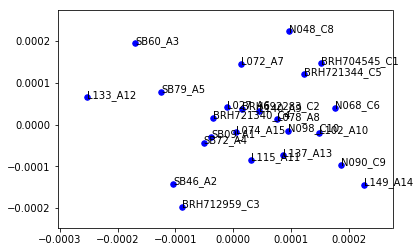

In [20]:
# Use original data to try SNE
Y = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=3000, random_state=0).fit_transform(All)
x_coords = Y[:, 0]
y_coords = Y[:, 1]
plt.scatter(x_coords, y_coords,c='blue', s = 30)

for label, x, y in zip(All_labels, x_coords, y_coords):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.xlim(x_coords.min()-0.00005, x_coords.max()+0.00005)
plt.ylim(y_coords.min()-0.00005, y_coords.max()+0.00005)
plt.show()

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 23 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 24 / 24
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.000000
[t-SNE] Error after 75 iterations: 0.000000


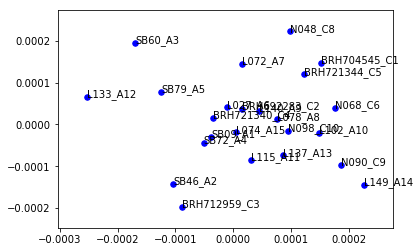

In [21]:
# Use Latent layer with 3 layers and 30 representations to try SNE
Y = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=3000, random_state=0).fit_transform(Latent_representation_3_30)
x_coords = Y[:, 0]
y_coords = Y[:, 1]
plt.scatter(x_coords, y_coords, c='blue', s = 30)

for label, x, y in zip(All_labels, x_coords, y_coords):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.xlim(x_coords.min()-0.00005, x_coords.max()+0.00005)
plt.ylim(y_coords.min()-0.00005, y_coords.max()+0.00005)
plt.show()

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 23 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 24 / 24
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.000000
[t-SNE] Error after 75 iterations: 0.000000


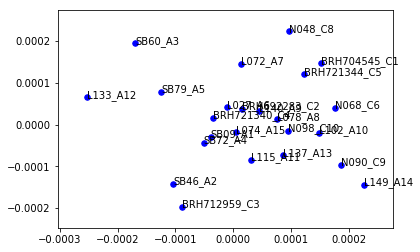

In [22]:
# Use Latent layer with 1 layers and 30 representations to try SNE
Y = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=3000, random_state=0).fit_transform(Latent_representation_1_30)
x_coords = Y[:, 0]
y_coords = Y[:, 1]
plt.scatter(x_coords, y_coords, c='blue', s = 30)

for label, x, y in zip(All_labels, x_coords, y_coords):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.xlim(x_coords.min()-0.00005, x_coords.max()+0.00005)
plt.ylim(y_coords.min()-0.00005, y_coords.max()+0.00005)
plt.show()

## t-SNE on T-cell and whole-blood-cell seperately

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 14 / 14
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.000000
[t-SNE] Error after 75 iterations: 0.000000


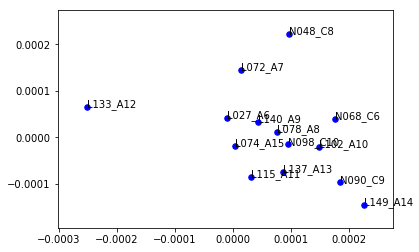

In [23]:
# Use original t-cell data to try SNE
Y = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=3000, random_state=0).fit_transform(t_cell)
x_coords = Y[:, 0]
y_coords = Y[:, 1]
plt.scatter(x_coords, y_coords,c='blue', s = 30)

for label, x, y in zip(t_cell_labels, x_coords, y_coords):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.xlim(x_coords.min()-0.00005, x_coords.max()+0.00005)
plt.ylim(y_coords.min()-0.00005, y_coords.max()+0.00005)
plt.show()

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 14 / 14
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.000000
[t-SNE] Error after 75 iterations: 0.000000


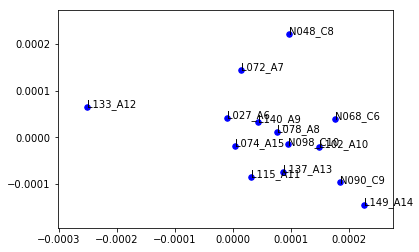

In [24]:
# Use 3-layer latent t-cell data to try SNE
Y = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=3000, random_state=0).fit_transform(Latent_representation_3_30_t_cell)
x_coords = Y[:, 0]
y_coords = Y[:, 1]
plt.scatter(x_coords, y_coords,c='blue', s = 30)

for label, x, y in zip(t_cell_labels, x_coords, y_coords):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.xlim(x_coords.min()-0.00005, x_coords.max()+0.00005)
plt.ylim(y_coords.min()-0.00005, y_coords.max()+0.00005)
plt.show()

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 14 / 14
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.000000
[t-SNE] Error after 75 iterations: 0.000000


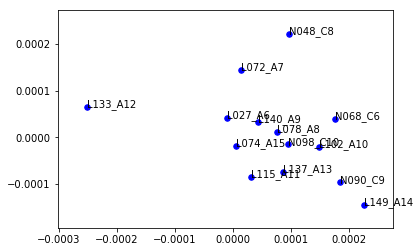

In [25]:
# Use 1-layer latent t-cell data to try SNE
Y = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=3000, random_state=0).fit_transform(Latent_representation_1_30_t_cell)
x_coords = Y[:, 0]
y_coords = Y[:, 1]
plt.scatter(x_coords, y_coords,c='blue', s = 30)

for label, x, y in zip(t_cell_labels, x_coords, y_coords):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.xlim(x_coords.min()-0.00005, x_coords.max()+0.00005)
plt.ylim(y_coords.min()-0.00005, y_coords.max()+0.00005)
plt.show()

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.000000
[t-SNE] Error after 75 iterations: 0.000000


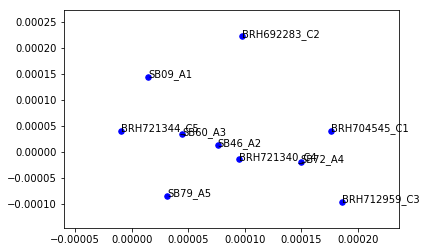

In [26]:
# Use original whole-blood-cell data to try SNE
Y = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=3000, random_state=0).fit_transform(whole_blood)
x_coords = Y[:, 0]
y_coords = Y[:, 1]
plt.scatter(x_coords, y_coords,c='blue', s = 30)

for label, x, y in zip(whole_blood_labels, x_coords, y_coords):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.xlim(x_coords.min()-0.00005, x_coords.max()+0.00005)
plt.ylim(y_coords.min()-0.00005, y_coords.max()+0.00005)
plt.show()

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.000000
[t-SNE] Error after 75 iterations: 0.000000


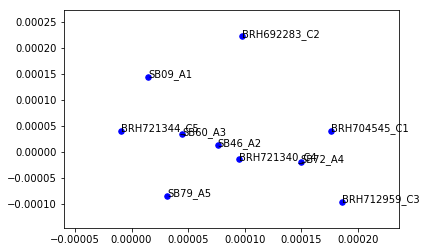

In [27]:
# Use 3-layer latent whole-blood-cell data to try SNE
Y = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=3000, random_state=0).fit_transform(Latent_representation_3_30_whole_blood)
x_coords = Y[:, 0]
y_coords = Y[:, 1]
plt.scatter(x_coords, y_coords,c='blue', s = 30)

for label, x, y in zip(whole_blood_labels, x_coords, y_coords):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.xlim(x_coords.min()-0.00005, x_coords.max()+0.00005)
plt.ylim(y_coords.min()-0.00005, y_coords.max()+0.00005)
plt.show()

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.000000
[t-SNE] Error after 75 iterations: 0.000000


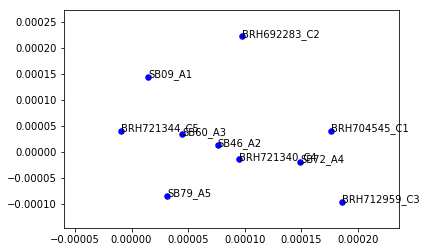

In [28]:
# Use 1-layer latent whole-blood-cell data to try SNE
Y = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=3000, random_state=0).fit_transform(Latent_representation_1_30_whole_blood)
x_coords = Y[:, 0]
y_coords = Y[:, 1]
plt.scatter(x_coords, y_coords,c='blue', s = 30)

for label, x, y in zip(whole_blood_labels, x_coords, y_coords):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.xlim(x_coords.min()-0.00005, x_coords.max()+0.00005)
plt.ylim(y_coords.min()-0.00005, y_coords.max()+0.00005)
plt.show()

## Random Forest for original dataset

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

In [9]:
df = pd.DataFrame(data=All)
df.columns = Gene_labels
df.head(3)

,AAK1,AATK,ABL1,ABL2,ACTR2,ACVR1,ACVR1B,ACVR1C,ACVR2A,ACVR2B,...,VRK2,VRK3,WEE1,WNK1,WNK2,WNK3,WNK4,YES1,ZAK,ZAP70
0,0.009477,0.000395,0.012436,0.003343,0.174683,0.012814,0.007406,0.000794,0.002863,0.002178,...,0.005871,0.049148,0.002481,0.037669,0.000030,0.000062,0.000015,0.001420,0.000330,0.163027
1,0.008785,0.000639,0.018726,0.004782,0.172142,0.020314,0.010798,0.002070,0.002822,0.002219,...,0.008533,0.026584,0.007353,0.038298,0.000024,0.000019,0.000023,0.010047,0.001174,0.111538
2,0.017656,0.000157,0.019320,0.006582,0.209712,0.019420,0.013703,0.001859,0.003471,0.002033,...,0.009002,0.027800,0.005150,0.060903,0.000004,0.000020,0.000012,0.011017,0.000884,0.136870


In [10]:
All_labels_set = []
for i in list(range(0,24)):
    if i <9:
        All_labels_set.append('Control')
    else:
        All_labels_set.append('Active')
        
# Convert string column to integer
def str_column_to_int(labels):
    unique = set(labels)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for label in labels:
        label_int = lookup[label]
    return lookup

# convert class column to integers
str_column_to_int(All_labels_set)

Labels = []
for label in All_labels_set:
    int_ = str_column_to_int(All_labels_set)[label]
    Labels.append(int_)
Labels

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df, Labels, test_size = 0.2, random_state = 1992)

In [12]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=5000,random_state = 42)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


In [13]:
# Test Random Forest
print('predict labels:',random_forest.predict(x_test))
print('True labels:',y_test)

predict labels: [0 0 1 0 1]
True labels: [0, 1, 1, 0, 1]


In [14]:
# select top 30 important features
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(30)

,importance
feature,
ACVR2A,0.020
MAST4,0.019
CDKL5,0.016
PDIK1L,0.016
ROCK1,0.015
EPHA4,0.014
DAPK3,0.013
MINK1,0.013
PRKD3,0.012


In [15]:
df_important = df[importances.head(30).index.values.tolist()]
All_important_30 = df_important.values.tolist()
df_important.head(2)

,ACVR2A,MAST4,CDKL5,PDIK1L,ROCK1,EPHA4,DAPK3,MINK1,PRKD3,MAP2K2,...,PRKAA1,LATS1,ABL2,SLK,HIPK2,CDC42BPA,TRPM7,ABL1,PTK6,MAPK8
0,0.002863,0.006491,0.000503,0.004384,0.018364,0.004006,0.017952,0.038796,0.015475,0.102463,...,0.020370,0.012488,0.003343,0.015767,0.008879,0.000276,0.013070,0.012436,0.00029,0.005474
1,0.002822,0.008820,0.000865,0.011355,0.026204,0.015947,0.014151,0.045299,0.013960,0.112681,...,0.023237,0.024117,0.004782,0.018016,0.010585,0.000101,0.011791,0.018726,0.00059,0.007530


[t-SNE] Computing pairwise distances...
[t-SNE] Computing 23 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 24 / 24
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.000000
[t-SNE] Error after 75 iterations: 0.000000


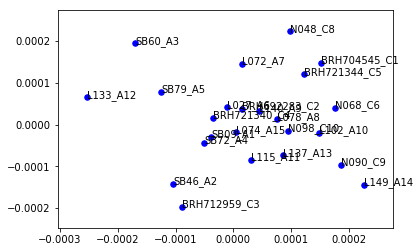

In [47]:
# Use 30 important genes represent data to try SNE
Y = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=3000, random_state=0).fit_transform(All_important_30)
x_coords = Y[:, 0]
y_coords = Y[:, 1]
plt.scatter(x_coords, y_coords, c='blue', s = 30)

for label, x, y in zip(All_labels, x_coords, y_coords):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.xlim(x_coords.min()-0.00005, x_coords.max()+0.00005)
plt.ylim(y_coords.min()-0.00005, y_coords.max()+0.00005)
plt.show()

In [48]:
data.head()

,Unnamed: 0,Control,Control.1,Control.2,Control.3,Control.4,Control.5,Control.6,Control.7,Control.8,...,Active.5,Active.6,Active.7,Active.8,Active.9,Active.10,Active.11,Active.12,Active.13,Active.14
1,AAK1,3.10222,3.03061,3.62826,3.65166,3.10777,6.96842,5.77243,10.9014,10.2875,...,5.97548,5.52087,3.85952,10.0141,5.26479,2.59377,3.94899,6.0539,8.11273,5.18261
2,AATK,46.3928,26.4645,37.7752,15.443,24.0308,0.290432,0.419944,0.0966814,0.122613,...,0.0713315,0.101865,0.252447,7.18745,0.397463,1.65778,0.07257,0.0817095,1.87231,0.0637144
3,ABL1,5.75962,4.7267,5.66803,6.70431,6.0389,9.14402,12.3046,11.9289,13.0479,...,9.72682,9.31309,9.50624,9.90909,8.51167,7.96014,9.00842,10.791,9.37966,8.29715
4,ABL2,0.983849,1.15824,1.18376,1.08975,1.04842,2.45811,3.14215,4.06403,4.22899,...,2.32392,2.16219,1.58991,3.15292,2.06103,1.51085,1.60301,3.96468,2.52728,2.01078
5,ACTR2,119.188,142.393,113.725,94.7879,99.1535,128.443,113.112,129.483,130.877,...,188.036,156.263,281.784,79.9182,198.182,215.051,166.709,113.996,135.957,200.302


## Random forest on T-cell, Whold-blood cell separately

#### RF for T-cell until converge

In [242]:
data_T_cell = data_T_cell.transpose()
data_T_cell

Tracking_ID,AAK1,AATK,ABL1,ABL2,ACTR2,ACVR1,ACVR1B,ACVR1C,ACVR2A,ACVR2B,...,VRK2,VRK3,WEE1,WNK1,WNK2,WNK3,WNK4,YES1,ZAK,ZAP70
N068_C6,0.009477,0.000395,0.012436,0.003343,0.174683,0.012814,0.007406,0.000794,0.002863,0.002178,...,0.005871,0.049148,0.002481,0.037669,0.000030,0.000062,0.000015,0.001420,0.000330,0.163027
N048_C8,0.008785,0.000639,0.018726,0.004782,0.172142,0.020314,0.010798,0.002070,0.002822,0.002219,...,0.008533,0.026584,0.007353,0.038298,0.000024,0.000019,0.000023,0.010047,0.001174,0.111538
N090_C9,0.017656,0.000157,0.019320,0.006582,0.209712,0.019420,0.013703,0.001859,0.003471,0.002033,...,0.009002,0.027800,0.005150,0.060903,0.000004,0.000020,0.000012,0.011017,0.000884,0.136870
N098_C10,0.015737,0.000188,0.019959,0.006469,0.200202,0.022623,0.012461,0.001758,0.003111,0.002007,...,0.009742,0.027854,0.004906,0.058269,0.000024,0.000022,0.000028,0.016288,0.000517,0.143858
L027_A6,0.007811,0.000093,0.012715,0.003038,0.245796,0.014610,0.005578,0.000601,0.002059,0.001186,...,0.009650,0.044210,0.002355,0.041825,0.000003,0.000042,0.000000,0.002303,0.000603,0.112102
L072_A7,0.008180,0.000151,0.013798,0.003203,0.231516,0.018220,0.005799,0.001214,0.002725,0.001415,...,0.007002,0.043600,0.007018,0.037319,0.000061,0.000037,0.000006,0.003154,0.001225,0.137914
L078_A8,0.004779,0.000313,0.011770,0.001969,0.348900,0.012909,0.006866,0.000442,0.002862,0.000778,...,0.013324,0.040965,0.004532,0.042607,0.000030,0.000018,0.000025,0.001498,0.002299,0.114187
L140_A9,0.012029,0.008634,0.011903,0.003787,0.095999,0.010414,0.004744,0.002253,0.002883,0.002008,...,0.005872,0.029380,0.001825,0.027526,0.000027,0.000033,0.000025,0.002957,0.000288,0.325950
L102_A10,0.007010,0.000529,0.011334,0.002744,0.263893,0.008903,0.005812,0.001153,0.002673,0.001400,...,0.007817,0.038433,0.009966,0.036072,0.000013,0.000044,0.000011,0.003076,0.001650,0.099940
L115_A11,0.003050,0.001949,0.009359,0.001776,0.252856,0.013767,0.004022,0.000688,0.000859,0.000561,...,0.012181,0.036751,0.006248,0.030290,0.000018,0.000033,0.000000,0.001091,0.001103,0.128546


In [243]:
T_labels_set = []
for i in list(range(0,14)):
    if i <4:
        T_labels_set.append('Control')
    else:
        T_labels_set.append('Active')
        
# Convert string column to integer
def str_column_to_int(labels):
    unique = set(labels)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for label in labels:
        label_int = lookup[label]
    return lookup

# convert class column to integers
str_column_to_int(T_labels_set)

T_Labels = []
for label in T_labels_set:
    int_ = str_column_to_int(T_labels_set)[label]
    T_Labels.append(int_)
T_Labels

[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [244]:
x_train, x_test, y_train, y_test = train_test_split(data_T_cell, T_Labels, test_size = 0.1, random_state = 1992)

In [245]:
# Random Forest
random_forest = RandomForestClassifier(max_features =0.5 ,n_estimators=110000,random_state = 42)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


In [246]:
# Test Random Forest
print('predict labels:',random_forest.predict(x_test))
print('True labels:',y_test)

predict labels: [0 0]
True labels: [0, 1]


In [247]:
# select top 30 important features
importances = pd.DataFrame({'feature':data_T_cell.columns,
                            'importance':np.round(random_forest.feature_importances_,3)})

importantce_score = importances['importance'].values.tolist()

importances

,feature,importance
0,AAK1,0.002
1,AATK,0.000
2,ABL1,0.002
3,ABL2,0.003
4,ACTR2,0.002
5,ACVR1,0.001
6,ACVR1B,0.020
7,ACVR1C,0.001
8,ACVR2A,0.003
9,ACVR2B,0.006


In [248]:
importances = importances.sort_values('importance',ascending=False).set_index('feature')
T_important_kinase_30 = importances.head(30).index.values.tolist()
T_important_kinase_42 = importances.head(42).index.values.tolist()

importances.head(42)

,importance
feature,
DYRK2,0.020
MAP3K4,0.020
ACVR1B,0.020
PSKH1,0.020
LMTK3,0.020
MAST4,0.019
TLK1,0.019
MAPKAPK3,0.019
MAPK13,0.019


#### t-score， p-value for t-cell

In [104]:
data_T_cell = data_T_cell.transpose()
data_T_cell.head(2)

,N068_C6,N048_C8,N090_C9,N098_C10,L027_A6,L072_A7,L078_A8,L140_A9,L102_A10,L115_A11,L133_A12,L137_A13,L149_A14,L074_A15,t_score,p_value,importantce_score,T_Control_Avg,T_Active_Avg,T_Active/Control
Tracking_ID,,,,,,,,,,,,,,,,,,,,
AAK1,0.009477,0.008785,0.017656,0.015737,0.007811,0.008180,0.004779,0.012029,0.007010,0.003050,0.005815,0.009514,0.012363,0.006679,2.581969,0.024011,0.002,0.012914,0.007723,0.598050
AATK,0.000395,0.000639,0.000157,0.000188,0.000093,0.000151,0.000313,0.008634,0.000529,0.001949,0.000107,0.000128,0.002853,0.000082,-0.827178,0.424280,0.000,0.000345,0.001484,4.306826


In [105]:
data_control_T_cell = data_T_cell[['N068_C6', 'N048_C8','N090_C9','N098_C10']]

data_active_T_cell = data_T_cell[['L027_A6','L072_A7','L078_A8','L140_A9','L102_A10','L115_A11',
                    'L133_A12','L137_A13','L149_A14','L074_A15']]

In [106]:
from scipy import stats

t_score_list = [] 
p_values_list = []
for label in Gene_labels:
    a = data_control_T_cell.loc[label].tolist()
    b = data_active_T_cell.loc[label].tolist()
    t_score = abs(stats.ttest_ind(a,b)[0])
    t_score_list.append(t_score)
    p_values = abs(stats.ttest_ind(a,b)[1])
    p_values_list.append(p_values)
    
data_T_cell['t_score'] = t_score_list
data_T_cell['p_value'] = p_values_list
data_T_cell['importantce_score'] = importantce_score

data_T_cell.head(2)

,N068_C6,N048_C8,N090_C9,N098_C10,L027_A6,L072_A7,L078_A8,L140_A9,L102_A10,L115_A11,L133_A12,L137_A13,L149_A14,L074_A15,t_score,p_value,importantce_score,T_Control_Avg,T_Active_Avg,T_Active/Control
Tracking_ID,,,,,,,,,,,,,,,,,,,,
AAK1,0.009477,0.008785,0.017656,0.015737,0.007811,0.008180,0.004779,0.012029,0.007010,0.003050,0.005815,0.009514,0.012363,0.006679,2.581969,0.024011,0.002,0.012914,0.007723,0.598050
AATK,0.000395,0.000639,0.000157,0.000188,0.000093,0.000151,0.000313,0.008634,0.000529,0.001949,0.000107,0.000128,0.002853,0.000082,0.827178,0.424280,0.000,0.000345,0.001484,4.306826


#### differential gene expression A-avg/C-avg for t-cell

In [107]:
data_T_cell['T_Control_Avg'] = (data_T_cell['N068_C6']
                                +data_T_cell['N048_C8']
                                +data_T_cell['N090_C9']
                                +data_T_cell['N098_C10'])/4
data_T_cell['T_Active_Avg'] = (data_T_cell['L027_A6']
                                +data_T_cell['L072_A7']
                                +data_T_cell['L078_A8']
                                +data_T_cell['L140_A9']
                                +data_T_cell['L102_A10']
                                +data_T_cell['L115_A11']
                                +data_T_cell['L133_A12']
                                +data_T_cell['L137_A13']
                                +data_T_cell['L149_A14']
                                +data_T_cell['L074_A15'])/10
data_T_cell['T_Active/Control']  = data_T_cell['T_Active_Avg']/data_T_cell['T_Control_Avg']

data_T_cell

,N068_C6,N048_C8,N090_C9,N098_C10,L027_A6,L072_A7,L078_A8,L140_A9,L102_A10,L115_A11,L133_A12,L137_A13,L149_A14,L074_A15,t_score,p_value,importantce_score,T_Control_Avg,T_Active_Avg,T_Active/Control
Tracking_ID,,,,,,,,,,,,,,,,,,,,
AAK1,0.009477,0.008785,0.017656,0.015737,0.007811,0.008180,0.004779,0.012029,0.007010,0.003050,0.005815,0.009514,0.012363,0.006679,2.581969,0.024011,0.002,0.012914,0.007723,0.598050
AATK,0.000395,0.000639,0.000157,0.000188,0.000093,0.000151,0.000313,0.008634,0.000529,0.001949,0.000107,0.000128,0.002853,0.000082,0.827178,0.424280,0.000,0.000345,0.001484,4.306826
ABL1,0.012436,0.018726,0.019320,0.019959,0.012715,0.013798,0.011770,0.011903,0.011334,0.009359,0.013264,0.016959,0.014294,0.010693,3.334275,0.005951,0.002,0.017610,0.012609,0.716002
ABL2,0.003343,0.004782,0.006582,0.006469,0.003038,0.003203,0.001969,0.003787,0.002744,0.001776,0.002360,0.006231,0.003851,0.002591,2.676332,0.020173,0.003,0.005294,0.003155,0.595994
ACTR2,0.174683,0.172142,0.209712,0.200202,0.245796,0.231516,0.348900,0.095999,0.263893,0.252856,0.245467,0.179159,0.207193,0.258141,1.294056,0.219997,0.002,0.189185,0.232892,1.231030
ACVR1,0.012814,0.020314,0.019420,0.022623,0.014610,0.018220,0.012909,0.010414,0.008903,0.013767,0.008447,0.025284,0.019702,0.017554,1.277831,0.225476,0.001,0.018793,0.014981,0.797169
ACVR1B,0.007406,0.010798,0.013703,0.012461,0.005578,0.005799,0.006866,0.004744,0.005812,0.004022,0.004595,0.008874,0.004688,0.003887,5.026534,0.000296,0.020,0.011092,0.005487,0.494636
ACVR1C,0.000794,0.002070,0.001859,0.001758,0.000601,0.001214,0.000442,0.002253,0.001153,0.000688,0.000731,0.001874,0.001336,0.000576,1.520336,0.154329,0.001,0.001620,0.001087,0.670698
ACVR2A,0.002863,0.002822,0.003471,0.003111,0.002059,0.002725,0.002862,0.002883,0.002673,0.000859,0.001251,0.003724,0.002241,0.001180,1.728791,0.109463,0.003,0.003067,0.002246,0.732239


In [108]:
data_T_Cell_Important_T_Score_Diff = data_T_cell.transpose()[T_important_kinase_30]
data_T_Cell_Important_T_Score_Diff = data_T_Cell_Important_T_Score_Diff.transpose()
data_T_Cell_Important_T_Score_Diff = data_T_Cell_Important_T_Score_Diff[['importantce_score',
                                                                         'T_Active/Control',
                                                                         't_score',
                                                                         'p_value']]

data_T_Cell_Important_T_Score_Diff

,importantce_score,T_Active/Control,t_score,p_value
Tracking_ID,,,,
DYRK2,0.020,0.856241,0.882546,0.394818
MAP3K4,0.020,0.527478,4.781720,0.000447
ACVR1B,0.020,0.494636,5.026534,0.000296
PSKH1,0.020,0.764159,4.715861,0.000501
LMTK3,0.020,0.554995,3.364356,0.005629
MAST4,0.019,0.471058,4.805208,0.000430
TLK1,0.019,0.671986,2.922287,0.012786
MAPKAPK3,0.019,2.326498,4.008658,0.001734
MAPK13,0.019,0.701664,3.411177,0.005162


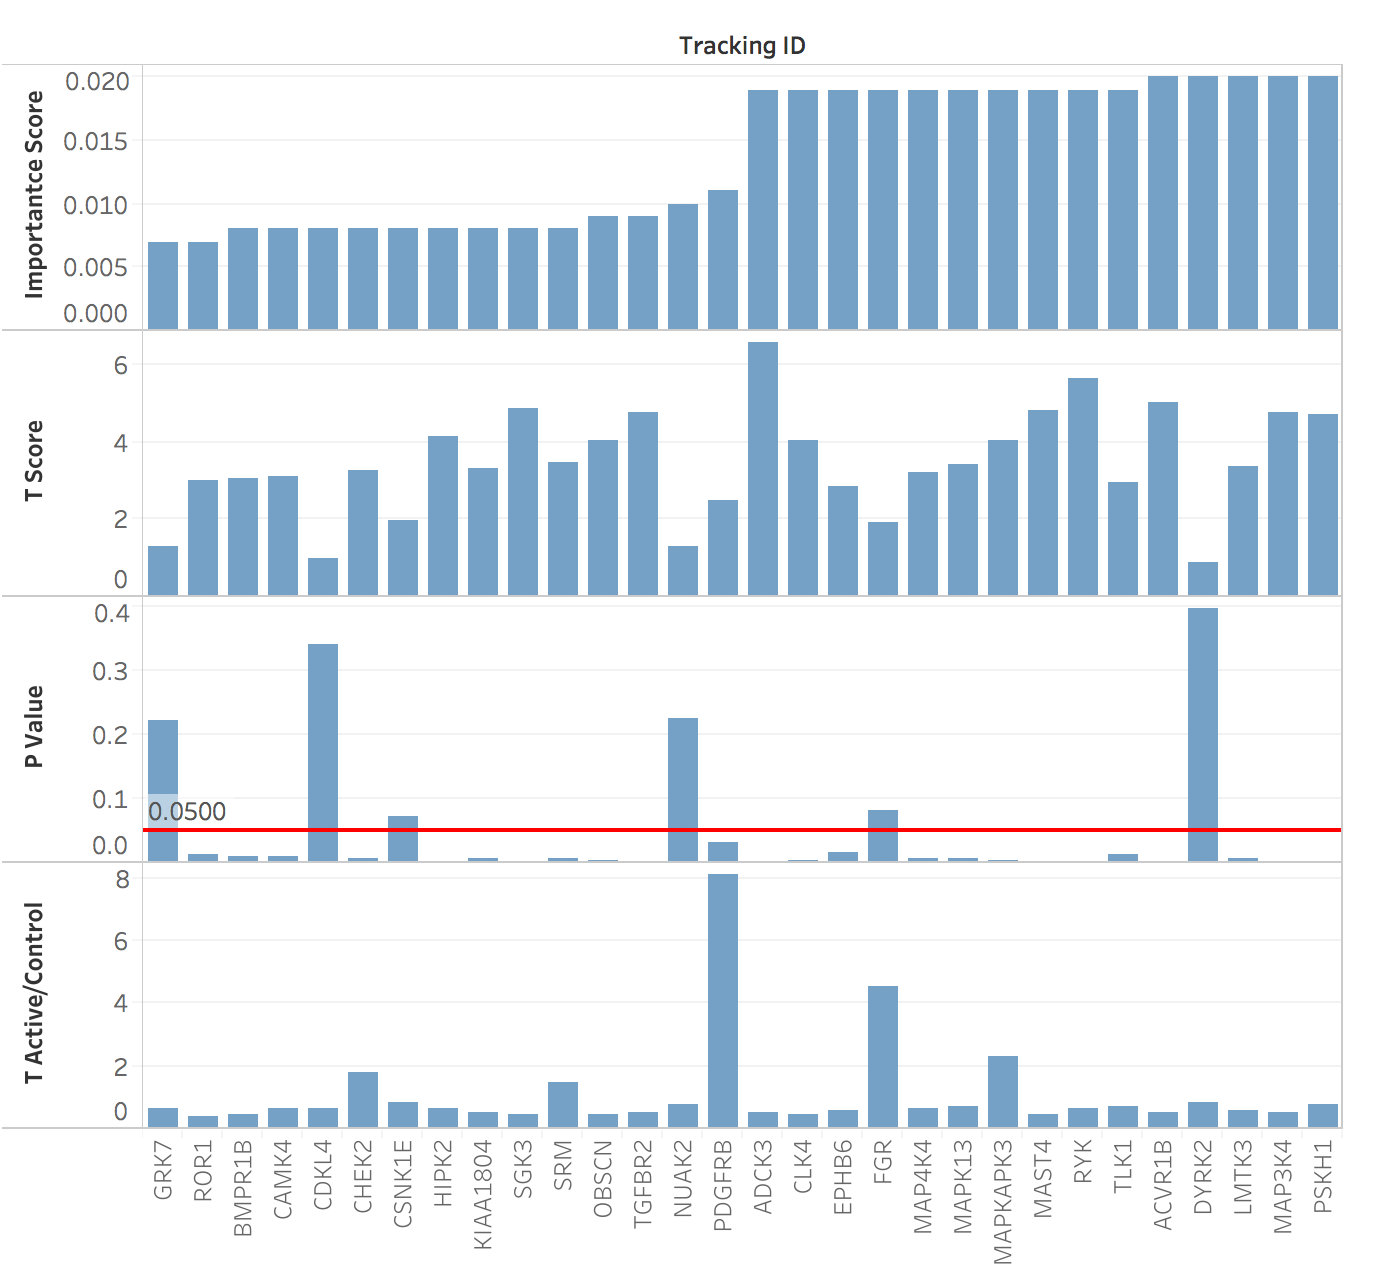

#### 【废】 find overlap with 199hign_IR_gene

In [58]:
hign_IR_gene = pd.read_csv("CD4_high_IR_gene_list.txt")
hign_IR_gene_list = hign_IR_gene['GPN2'].values.tolist()
hign_IR_gene_list.append('GPN2')

200

In [37]:
# do differential on t-cell kinse

In [40]:
data_T_cell = data_T_cell.transpose()
data_T_cell

,N068_C6,N048_C8,N090_C9,N098_C10,L027_A6,L072_A7,L078_A8,L140_A9,L102_A10,L115_A11,L133_A12,L137_A13,L149_A14,L074_A15
Tracking_ID,,,,,,,,,,,,,,
AAK1,0.009477,0.008785,0.017656,0.015737,0.007811,0.008180,0.004779,0.012029,0.007010,0.003050,0.005815,0.009514,0.012363,0.006679
AATK,0.000395,0.000639,0.000157,0.000188,0.000093,0.000151,0.000313,0.008634,0.000529,0.001949,0.000107,0.000128,0.002853,0.000082
ABL1,0.012436,0.018726,0.019320,0.019959,0.012715,0.013798,0.011770,0.011903,0.011334,0.009359,0.013264,0.016959,0.014294,0.010693
ABL2,0.003343,0.004782,0.006582,0.006469,0.003038,0.003203,0.001969,0.003787,0.002744,0.001776,0.002360,0.006231,0.003851,0.002591
ACTR2,0.174683,0.172142,0.209712,0.200202,0.245796,0.231516,0.348900,0.095999,0.263893,0.252856,0.245467,0.179159,0.207193,0.258141
ACVR1,0.012814,0.020314,0.019420,0.022623,0.014610,0.018220,0.012909,0.010414,0.008903,0.013767,0.008447,0.025284,0.019702,0.017554
ACVR1B,0.007406,0.010798,0.013703,0.012461,0.005578,0.005799,0.006866,0.004744,0.005812,0.004022,0.004595,0.008874,0.004688,0.003887
ACVR1C,0.000794,0.002070,0.001859,0.001758,0.000601,0.001214,0.000442,0.002253,0.001153,0.000688,0.000731,0.001874,0.001336,0.000576
ACVR2A,0.002863,0.002822,0.003471,0.003111,0.002059,0.002725,0.002862,0.002883,0.002673,0.000859,0.001251,0.003724,0.002241,0.001180


In [41]:
data_T_cell['T_Control_Avg'] = (data_T_cell['N068_C6']
                                +data_T_cell['N048_C8']
                                +data_T_cell['N090_C9']
                                +data_T_cell['N098_C10'])/4
data_T_cell['T_Active_Avg'] = (data_T_cell['L027_A6']
                                +data_T_cell['L072_A7']
                                +data_T_cell['L078_A8']
                                +data_T_cell['L140_A9']
                                +data_T_cell['L102_A10']
                                +data_T_cell['L115_A11']
                                +data_T_cell['L133_A12']
                                +data_T_cell['L137_A13']
                                +data_T_cell['L149_A14']
                                +data_T_cell['L074_A15'])/10
data_T_cell['T_Active/Control']  = data_T_cell['T_Active_Avg']/data_T_cell['T_Control_Avg']

data_T_cell_Diff = data_T_cell[['T_Active_Avg','T_Control_Avg','T_Active/Control']]
data_T_cell_Diff = data_T_cell_Diff.sort_values(by='T_Active/Control',ascending=False)

data_T_cell_Diff

,T_Active_Avg,T_Control_Avg,T_Active/Control
Tracking_ID,,,
PAK7,5.834539e-07,0.000000,inf
TSSK1B,4.028706e-06,0.000000,inf
CSNK1A1L,1.141174e-05,0.000000,inf
EPHA5,1.705964e-06,0.000000,inf
NPR1,4.392151e-06,0.000000,inf
OSR1,1.160269e-06,0.000000,inf
PDGFRA,1.331743e-06,0.000000,inf
INSRR,8.463555e-06,0.000000,inf
ERN2,4.232081e-06,0.000000,inf


In [59]:
#overlap all t-cell kinases:

overlap_t_cell_high_IR_kinase_list = []
for a in hign_IR_gene_list:
    for b in data_T_cell_Diff.index.tolist():
        if a == b:
            overlap_t_cell_high_IR_kinase_list.append(a) 
overlap_t_cell_high_IR_kinase_list

['SGK494', 'MAPK7']

### for whole-blood cell

In [220]:
data_Whole_Blood = data_Whole_Blood.transpose()
data_Whole_Blood

Tracking_ID,AAK1,AATK,ABL1,ABL2,ACTR2,ACVR1,ACVR1B,ACVR1C,ACVR2A,ACVR2B,...,VRK2,VRK3,WEE1,WNK1,WNK2,WNK3,WNK4,YES1,ZAK,ZAP70
BRH704545_C1,0.003003,0.044915,0.005576,0.000953,0.115392,0.003413,0.006607,0.000056,0.000797,0.000193,...,0.002709,0.039114,0.001755,0.017118,0.000164,0.000010,0.000007,0.000639,0.002156,0.118017
BRH692283_C2,0.003254,0.028414,0.005075,0.001244,0.152880,0.004498,0.006636,0.000180,0.001521,0.000339,...,0.003952,0.033892,0.001935,0.021885,0.000052,0.000010,0.000057,0.000607,0.003283,0.087790
BRH712959_C3,0.003585,0.037329,0.005601,0.001170,0.112382,0.004246,0.004694,0.000154,0.001308,0.000229,...,0.002815,0.038584,0.001353,0.016468,0.000039,0.000016,0.000014,0.000442,0.002580,0.110781
BRH721340_C4,0.003576,0.015121,0.006565,0.001067,0.092813,0.004299,0.005922,0.000050,0.001040,0.000228,...,0.003876,0.041663,0.002105,0.015656,0.000065,0.000008,0.000015,0.000452,0.002294,0.168613
BRH721344_C5,0.003543,0.027396,0.006884,0.001195,0.113037,0.004683,0.006471,0.000116,0.001680,0.000380,...,0.004381,0.041153,0.001521,0.018968,0.000035,0.000015,0.000028,0.000299,0.002960,0.118585
SB09_A1,0.003766,0.030558,0.006013,0.001879,0.142581,0.005171,0.006812,0.000149,0.001193,0.000708,...,0.007010,0.041350,0.001711,0.017271,0.000079,0.000019,0.000044,0.000721,0.002957,0.091708
SB46_A2,0.002621,0.024298,0.005188,0.001780,0.130124,0.006168,0.005250,0.000143,0.001337,0.000549,...,0.006704,0.038480,0.002137,0.017473,0.000016,0.000005,0.000000,0.000664,0.002447,0.125215
SB60_A3,0.002346,0.040701,0.005291,0.001403,0.145085,0.003645,0.009147,0.000079,0.000858,0.000244,...,0.009311,0.038330,0.003352,0.014185,0.000038,0.000017,0.000030,0.001392,0.002063,0.119913
SB72_A4,0.003594,0.036433,0.004694,0.001442,0.116545,0.004285,0.005892,0.000114,0.000724,0.000430,...,0.005714,0.039920,0.003597,0.015257,0.000024,0.000014,0.000065,0.000696,0.001848,0.102037
SB79_A5,0.005566,0.016552,0.007328,0.001874,0.132703,0.006103,0.005287,0.000386,0.001459,0.000688,...,0.009646,0.041424,0.004774,0.012390,0.000067,0.000063,0.000022,0.000986,0.001897,0.182949


In [221]:
WB_labels_set = []
for i in list(range(0,10)):
    if i <5:
        WB_labels_set.append('Control')
    else:
        WB_labels_set.append('Active')
        
# Convert string column to integer
def str_column_to_int(labels):
    unique = set(labels)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for label in labels:
        label_int = lookup[label]
    return lookup

# convert class column to integers
str_column_to_int(WB_labels_set)

WB_Labels = []
for label in WB_labels_set:
    int_ = str_column_to_int(WB_labels_set)[label]
    WB_Labels.append(int_)
WB_Labels

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [222]:
x_train, x_test, y_train, y_test = train_test_split(data_Whole_Blood, WB_Labels, test_size = 0.2, random_state = 1992)

In [223]:
# Random Forest
random_forest = RandomForestClassifier(max_features=0.5, n_estimators=110000,random_state = 42)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


In [224]:
# Test Random Forest
print('predict labels:',random_forest.predict(x_test))
print('True labels:',y_test)

predict labels: [0 1]
True labels: [0, 1]


In [225]:
# select top 30 important features
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importantce_score = importances['importance'].values.tolist()
importances


,feature,importance
0,AAK1,0.002
1,AATK,0.000
2,ABL1,0.000
3,ABL2,0.005
4,ACTR2,0.002
5,ACVR1,0.000
6,ACVR1B,0.001
7,ACVR1C,0.001
8,ACVR2A,0.000
9,ACVR2B,0.002


In [226]:
importances = importances.sort_values('importance',ascending=False).set_index('feature')
WB_important_kinase_30 = importances.head(30).index.values.tolist()
WB_important_kinase_42 = importances.head(42).index.values.tolist()

importances.head(30)

,importance
feature,
CDKL1,0.006
AURKA,0.006
PRKD2,0.006
JAK2,0.006
DYRK4,0.006
TTN,0.006
TTK,0.006
MAPK12,0.006
MAP3K2,0.006


#### t-score， p-value for whole-blood-cell

In [231]:
data_Whole_Blood = data_Whole_Blood.transpose()
data_Whole_Blood.head(2)

,BRH704545_C1,BRH692283_C2,BRH712959_C3,BRH721340_C4,BRH721344_C5,SB09_A1,SB46_A2,SB60_A3,SB72_A4,SB79_A5,t_score,p_value,importantce_score
Tracking_ID,,,,,,,,,,,,,
AAK1,0.003003,0.003254,0.003585,0.003576,0.003543,0.003766,0.002621,0.002346,0.003594,0.005566,0.322475,0.755359,0.002
AATK,0.044915,0.028414,0.037329,0.015121,0.027396,0.030558,0.024298,0.040701,0.036433,0.016552,0.140134,0.892018,0.000


In [232]:
data_control_Whole_Blood = data_Whole_Blood[['BRH704545_C1','BRH692283_C2',
                                             'BRH712959_C3','BRH721340_C4','BRH721344_C5']]

data_active_Whole_Blood = data_Whole_Blood[['SB09_A1','SB46_A2','SB60_A3','SB72_A4','SB79_A5']]


In [233]:
from scipy import stats

t_score_list = [] 
p_values_list = []
for label in Gene_labels:
    a = data_control_Whole_Blood.loc[label].tolist()
    b = data_active_Whole_Blood.loc[label].tolist()
    t_score = abs(stats.ttest_ind(a,b)[0])
    t_score_list.append(t_score)
    p_values = abs(stats.ttest_ind(a,b)[1])
    p_values_list.append(p_values)
    
data_Whole_Blood['t_score'] = t_score_list
data_Whole_Blood['p_value'] = p_values_list
data_Whole_Blood['importantce_score'] = importantce_score

data_Whole_Blood.head(2)

,BRH704545_C1,BRH692283_C2,BRH712959_C3,BRH721340_C4,BRH721344_C5,SB09_A1,SB46_A2,SB60_A3,SB72_A4,SB79_A5,t_score,p_value,importantce_score
Tracking_ID,,,,,,,,,,,,,
AAK1,0.003003,0.003254,0.003585,0.003576,0.003543,0.003766,0.002621,0.002346,0.003594,0.005566,0.322475,0.755359,0.002
AATK,0.044915,0.028414,0.037329,0.015121,0.027396,0.030558,0.024298,0.040701,0.036433,0.016552,0.140134,0.892018,0.000


#### differential gene expression A-avg/C-avg for t-cell

In [234]:
data_Whole_Blood['T_Control_Avg'] = (data_Whole_Blood['BRH704545_C1']
                                +data_Whole_Blood['BRH692283_C2']
                                +data_Whole_Blood['BRH712959_C3']
                                +data_Whole_Blood['BRH721340_C4']
                                +data_Whole_Blood['BRH721344_C5'])/5
data_Whole_Blood['T_Active_Avg'] = (data_Whole_Blood['SB09_A1']
                                +data_Whole_Blood['SB46_A2']
                                +data_Whole_Blood['SB60_A3']
                                +data_Whole_Blood['SB72_A4']
                                +data_Whole_Blood['SB79_A5'])/5
data_Whole_Blood['T_Active/Control']  = data_Whole_Blood['T_Active_Avg']/data_Whole_Blood['T_Control_Avg']

data_Whole_Blood.head(2)

,BRH704545_C1,BRH692283_C2,BRH712959_C3,BRH721340_C4,BRH721344_C5,SB09_A1,SB46_A2,SB60_A3,SB72_A4,SB79_A5,t_score,p_value,importantce_score,T_Control_Avg,T_Active_Avg,T_Active/Control
Tracking_ID,,,,,,,,,,,,,,,,
AAK1,0.003003,0.003254,0.003585,0.003576,0.003543,0.003766,0.002621,0.002346,0.003594,0.005566,0.322475,0.755359,0.002,0.003392,0.003579,1.054964
AATK,0.044915,0.028414,0.037329,0.015121,0.027396,0.030558,0.024298,0.040701,0.036433,0.016552,0.140134,0.892018,0.000,0.030635,0.029709,0.969761


In [235]:
data_Whole_Blood_Important_T_Score_Diff = data_Whole_Blood.transpose()[WB_important_kinase_30]
data_Whole_Blood_Important_T_Score_Diff = data_Whole_Blood_Important_T_Score_Diff.transpose()
data_Whole_Blood_Important_T_Score_Diff = data_Whole_Blood_Important_T_Score_Diff[['importantce_score',
                                                                         'T_Active/Control',
                                                                         't_score',
                                                                         'p_value']]

data_Whole_Blood_Important_T_Score_Diff

,importantce_score,T_Active/Control,t_score,p_value
Tracking_ID,,,,
CDKL1,0.006,1.560796,2.052857,0.074178
AURKA,0.006,3.613253,2.967444,0.017941
PRKD2,0.006,1.353461,3.874911,0.004709
JAK2,0.006,2.368573,4.171477,0.003116
DYRK4,0.006,1.789636,2.779487,0.023943
TTN,0.006,1.873722,7.069094,0.000105
TTK,0.006,8.306758,2.867700,0.020903
MAPK12,0.006,4.443036,3.595139,0.007032
MAP3K2,0.006,1.636720,3.584915,0.007137


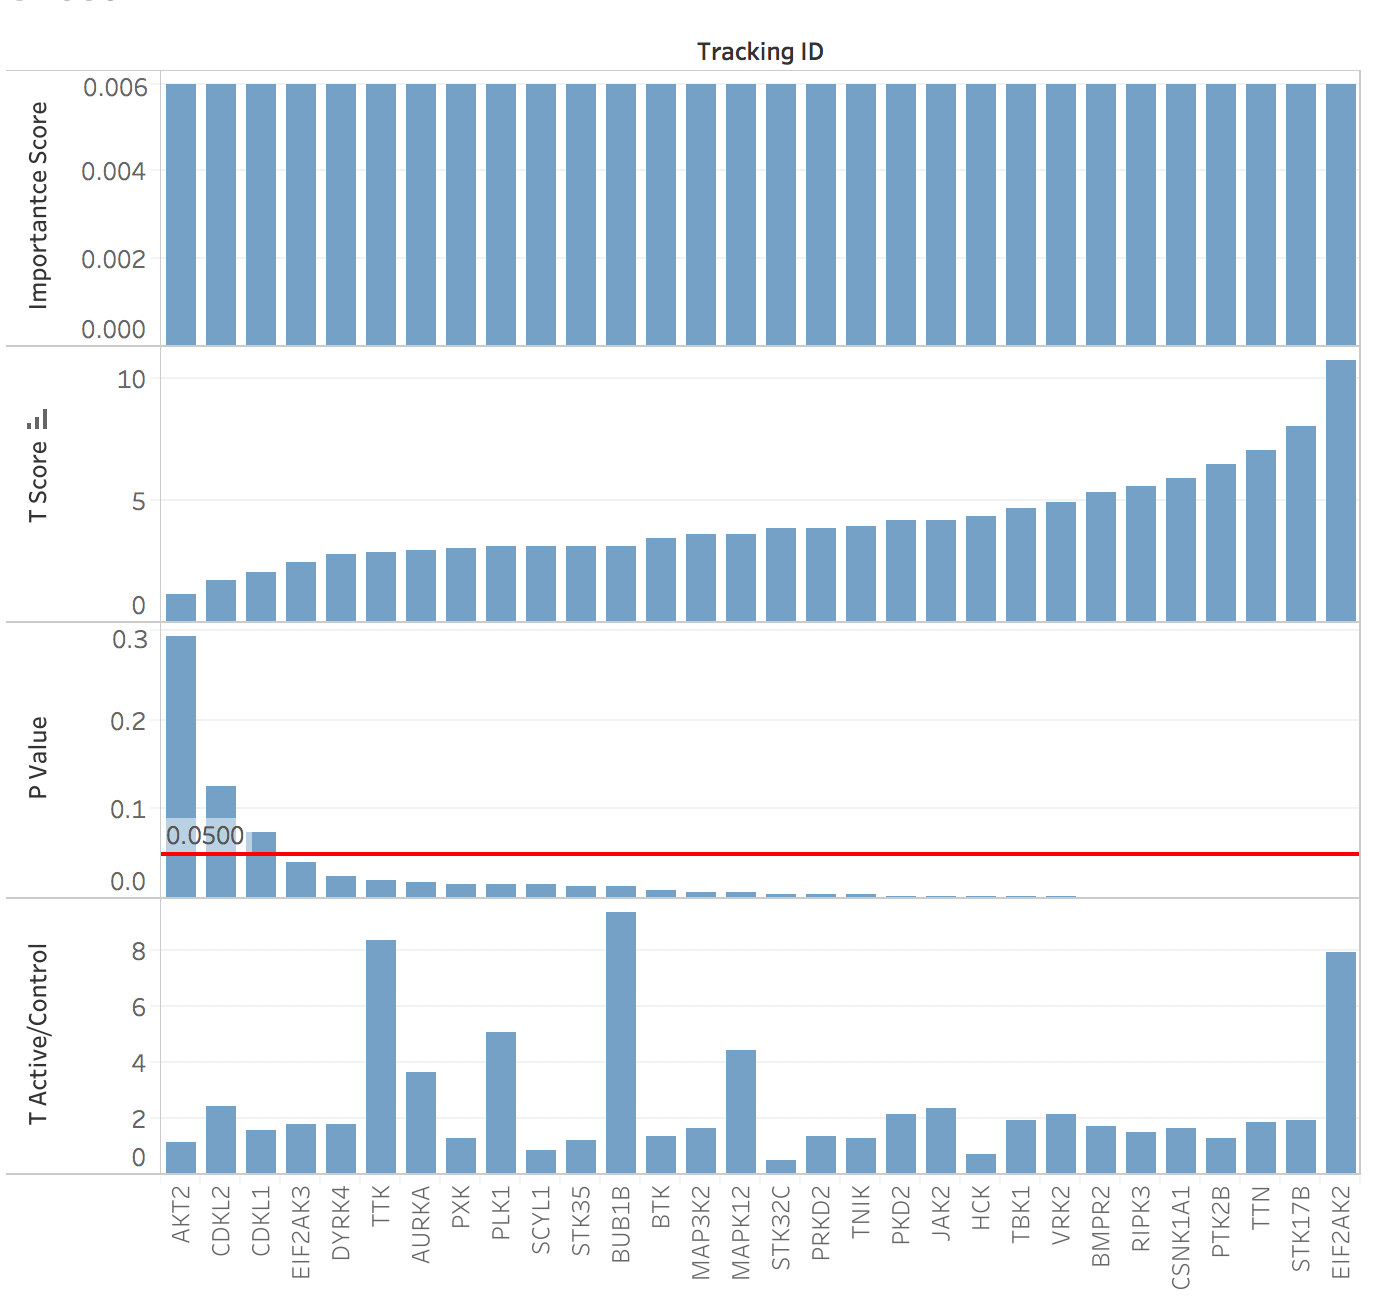

### CLUSTER MAP OF SPLICESOME

In [7]:
splicesome = pd.read_csv("cd4_spliceosome.csv")
splicesome = splicesome.set_index('tracking_id')
splicesome = splicesome.drop(['Unnamed: 0'], axis=1)
splicesome_list = splicesome.columns.get_values()
splicesome.index.names = ['']
splicesome.head(2)

,N068,N048,N090,N098,L005,L101,LL062,L031,L027,L072,L078,L140,L102,L115,L133,L137,L149,L074
,,,,,,,,,,,,,,,,,,
AQR,9.58936,13.5488,13.5126,14.8934,12.9238,11.5300,11.4694,9.56132,9.9572,8.94974,11.1450,10.8335,9.6011,6.90882,10.3821,12.1579,11.4208,9.0374
BCAS2,22.29730,96.9945,69.3639,88.2294,104.2310,61.6944,28.0516,54.21260,32.5138,45.08950,35.5695,20.8193,32.6226,30.71950,42.3063,100.7480,27.9138,43.7564


In [8]:
splicesome['Std'] = splicesome.std(axis = 1)
splicesome['Avg'] = (splicesome['N068']
                                +splicesome['N048']
                                +splicesome['N090']
                                +splicesome['N098']
                                +splicesome['L005']
                                +splicesome['L101']
                                +splicesome['LL062']
                                +splicesome['L031']
                                +splicesome['L027']
                                +splicesome['L072']
                                +splicesome['L078']
                                +splicesome['L140']
                                +splicesome['L102']
                                +splicesome['L115']
                                +splicesome['L133']
                                +splicesome['L137']
                                +splicesome['L149']
                                +splicesome['L074'])/18
splicesome['N068'] = (splicesome['N068']-splicesome['Avg'])/splicesome['Std']
splicesome['N068'].astype(str).astype(float)
splicesome['N048'] = (splicesome['N048']-splicesome['Avg'])/splicesome['Std']
splicesome['N048'].astype(str).astype(float)
splicesome['N090'] = (splicesome['N090']-splicesome['Avg'])/splicesome['Std']
splicesome['N090'].astype(str).astype(float)
splicesome['N098'] = (splicesome['N098']-splicesome['Avg'])/splicesome['Std']
splicesome['N098'].astype(str).astype(float)
splicesome['L005'] = (splicesome['L005']-splicesome['Avg'])/splicesome['Std']
splicesome['L005'].astype(str).astype(float)
splicesome['L101'] = (splicesome['L101']-splicesome['Avg'])/splicesome['Std']
splicesome['L101'].astype(str).astype(float)
splicesome['LL062'] = (splicesome['LL062']-splicesome['Avg'])/splicesome['Std']
splicesome['LL062'].astype(str).astype(float)
splicesome['L031'] = (splicesome['L031']-splicesome['Avg'])/splicesome['Std']
splicesome['L031'].astype(str).astype(float)
splicesome['L027'] = (splicesome['L027']-splicesome['Avg'])/splicesome['Std']
splicesome['L027'].astype(str).astype(float)
splicesome['L072'] = (splicesome['L072']-splicesome['Avg'])/splicesome['Std']
splicesome['L072'].astype(str).astype(float)
splicesome['L078'] = (splicesome['L078']-splicesome['Avg'])/splicesome['Std']
splicesome['L078'].astype(str).astype(float)
splicesome['L140'] = (splicesome['L140']-splicesome['Avg'])/splicesome['Std']
splicesome['L140'].astype(str).astype(float)
splicesome['L102'] = (splicesome['L102']-splicesome['Avg'])/splicesome['Std']
splicesome['L102'].astype(str).astype(float)
splicesome['L115'] = (splicesome['L115']-splicesome['Avg'])/splicesome['Std']
splicesome['L115'].astype(str).astype(float)
splicesome['L133'] = (splicesome['L133']-splicesome['Avg'])/splicesome['Std']
splicesome['L133'].astype(str).astype(float)
splicesome['L137'] = (splicesome['L137']-splicesome['Avg'])/splicesome['Std']
splicesome['L137'].astype(str).astype(float)
splicesome['L149'] = (splicesome['L149']-splicesome['Avg'])/splicesome['Std']
splicesome['L149'].astype(str).astype(float)
splicesome['L074'] = (splicesome['L074']-splicesome['Avg'])/splicesome['Std']
splicesome['L074'].astype(str).astype(float)

splicesome = splicesome.drop(['Std'], axis=1)
splicesome = splicesome.drop(['Avg'], axis=1)
splicesome = splicesome.fillna(0)
splicesome.head(2)

,N068,N048,N090,N098,L005,L101,LL062,L031,L027,L072,L078,L140,L102,L115,L133,L137,L149,L074
,,,,,,,,,,,,,,,,,,
AQR,-0.699651,1.309882,1.291509,1.992306,0.992676,0.285281,0.254525,-0.713882,-0.512961,-1.024277,0.089882,-0.068213,-0.693692,-2.060104,-0.297312,0.603959,0.229859,-0.979787
BCAS2,-1.054795,1.592222,0.613087,1.281616,1.848659,0.341305,-0.850882,0.076176,-0.692756,-0.247116,-0.584473,-1.107170,-0.688901,-0.756340,-0.345743,1.725233,-0.855765,-0.294357


In [9]:
import seaborn as sns; sns.set(color_codes=True)
groups = []
groups.extend(['Control']*4)
groups.extend(['Inacive']*4)
groups.extend(['Active']*10)
lut = dict(zip(set(groups), "rbg"))
print (lut)
col_colors = [lut[x] for x in groups]

{'Inacive': 'r', 'Active': 'b', 'Control': 'g'}


In [10]:
g = sns.clustermap(splicesome, col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('splicesome_cluster_map')

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [13]:
gene_index_list = g.dendrogram_row.reordered_ind
print(g.dendrogram_row.reordered_ind)

[93, 58, 38, 105, 115, 69, 71, 55, 52, 60, 66, 121, 134, 39, 51, 44, 119, 48, 53, 123, 143, 82, 127, 8, 88, 3, 73, 43, 62, 4, 16, 131, 89, 125, 95, 107, 118, 120, 117, 106, 57, 124, 92, 36, 74, 42, 122, 45, 50, 54, 67, 47, 138, 15, 19, 41, 40, 101, 136, 141, 33, 29, 23, 76, 63, 104, 34, 64, 49, 61, 24, 103, 37, 30, 113, 110, 32, 78, 77, 80, 56, 2, 25, 79, 31, 142, 13, 27, 20, 144, 97, 10, 99, 109, 132, 108, 139, 59, 111, 14, 28, 11, 85, 1, 128, 0, 133, 18, 65, 98, 46, 17, 137, 140, 72, 96, 135, 81, 112, 126, 100, 116, 84, 94, 90, 91, 9, 35, 70, 130, 26, 21, 83, 6, 12, 114, 22, 68, 5, 86, 75, 87, 7, 102, 129]


In [20]:
cluster_1 = gene_index_list[126:145]
cluster_2 = gene_index_list[76:126]
cluster_3 = gene_index_list[0:42]
cluster_4 = gene_index_list[0:20]
cluster_5 = gene_index_list[41:76]
cluster_6 = gene_index_list[40:125]
cluster_7 = gene_index_list[28:56]

In [21]:
print(cluster_5)

[124, 92, 36, 74, 42, 122, 45, 50, 54, 67, 47, 138, 15, 19, 41, 40, 101, 136, 141, 33, 29, 23, 76, 63, 104, 34, 64, 49, 61, 24, 103, 37, 30, 113, 110]


In [22]:
cluster_5_1 = [124, 92, 36, 74, 42, 122, 45, 50, 54, 67, 47,
               15, 41, 40, 101, 136, 33, 29, 23, 76, 63, 104, 49, 61, 24, 103, 37, 30]

In [23]:
gene_list = []
for i in cluster_5:
    gene = splicesome.index.tolist()[i]
    gene_list.append(gene)
print(gene_list)

['SNRPF', 'RNU4-1', 'GPKOW', 'PRPF19', 'ISY1', 'SNRPD3', 'LSM10', 'LSM2', 'LSM6', 'PPIL1', 'LSM12', 'USP39', 'CTNNBL1', 'CWC27', 'IK', 'HSPA8', 'SF3A3', 'U2AF2', 'WDR83', 'FAM50A', 'EFTUD2', 'DDX41', 'PRPF31', 'PLRG1', 'SF3B3', 'FRA10AC1', 'PPIE', 'LSM14B', 'NOSIP', 'DDX46', 'SF3B2', 'HNRNPA1', 'EIF4A3', 'SNRNP40', 'SMU1']


In [24]:
g = sns.clustermap(splicesome.ix[cluster_5_1], col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('splicesome_cluster_5_1_1_map')

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.
/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [25]:
print(cluster_5[:30])

[124, 92, 36, 74, 42, 122, 45, 50, 54, 67, 47, 138, 15, 19, 41, 40, 101, 136, 141, 33, 29, 23, 76, 63, 104, 34, 64, 49, 61, 24]


In [26]:
print(g.dendrogram_row.reordered_ind)

[26, 1, 15, 16, 17, 18, 19, 20, 21, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22, 23, 24, 25, 0, 27]


In [27]:
cluster_8 = [124, 92, 36, 50, 54, 67, 47, 138, 15, 19, 41, 40, 101, 136, 141, 33, 29, 23, 76, 63, 104, 34, 64, 49, 61, 24]

## splicesome from paper

In [28]:
splicesome_paper_all_gene_nor = pd.read_csv("SPLICESOME_PAPER_ALL_GENE_NOR.csv")
splicesome_paper_all_gene_nor = splicesome_paper_all_gene_nor.fillna(0)

splicesome_paper_all_gene_counts = pd.read_csv("SPLICESOME_PAPER_ALL_GENE_COUNTS.csv")
splicesome_paper_all_gene_counts = splicesome_paper_all_gene_counts.fillna(0)

splicesome_paper_all_gene_counts.head(2)

,Symbol,N048,N068,N090,N098,L005,L137,L101,L062,L149,L140,L031,L072,L133,L074,L078,L102,L115,L027
0,DKK1.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ZAR1.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
splicesome_paper_all_gene_nor.head(2)

,Symbol,N048,N068,N090,N098,L005,L137,L101,L062,L149,L140,L031,L072,L133,L074,L078,L102,L115,L027
0,DKK1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ZAR1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
splicesome_paper_150_counts_list = splicesome_paper_all_gene_counts.loc[splicesome_paper_all_gene_counts['Symbol'] == 'DKK1.00']

for i in splicesome.index.tolist():
    a = splicesome_paper_all_gene_counts.loc[splicesome_paper_all_gene_counts['Symbol'] == i]
    splicesome_paper_150_counts_list = splicesome_paper_150_counts_list.append(a)
splicesome_paper_150_counts_list = splicesome_paper_150_counts_list.drop(0)
splicesome_paper_150_counts_list.to_csv('splicesome_paper_150_counts_list.csv')
splicesome_paper_150_counts_list

,Symbol,N048,N068,N090,N098,L005,L137,L101,L062,L149,L140,L031,L072,L133,L074,L078,L102,L115,L027
985,AQR,11.0,10,13,13,10,10,10,12,14,11,6,11,9,9,9,8,7,9
1560,BCAS2,83.0,21,64,77,83,86,50,28,28,18,41,42,38,40,30,28,23,28
1835,BUD13,4.0,8,7,9,6,5,3,6,5,6,2,5,6,5,5,5,4,7
1836,BUD31,39.0,35,43,36,46,37,50,42,37,21,45,45,42,47,45,31,35,42
2466,C9orf78,154.0,100,112,139,133,157,141,106,92,102,124,114,113,100,110,109,101,114
2537,CACTIN,12.0,15,13,14,7,9,10,14,16,21,6,10,10,9,8,8,8,9
2648,CASC3,22.0,29,28,28,19,18,19,36,35,40,17,20,19,24,22,16,13,23
2725,CCAR1,16.0,21,24,18,15,15,11,24,36,33,6,16,17,11,10,10,6,12
2748,CCDC12,65.0,44,45,56,52,50,41,41,43,38,38,40,58,39,37,36,49,39
3017,CD2BP2,27.0,26,27,29,29,23,28,27,33,27,32,25,48,33,39,26,32,26


In [31]:
for i in splicesome.index.tolist():
    if i not in splicesome_paper_150_counts_list.Symbol.values.tolist():
        print (i) 
        
## after checking alternative names of these genes, only RNU2-1 not find

ESS2
LSM8
RNU2-1
SF3B6
SNU13


In [32]:
splicesome_paper_all_gene_counts = pd.read_csv("splicesome_paper_150_counts_list.csv")
splicesome_paper_all_gene_counts = splicesome_paper_all_gene_counts.drop('Unnamed: 0',axis = 1)
splicesome_paper_all_gene_counts = splicesome_paper_all_gene_counts.set_index('Symbol')
splicesome_paper_all_gene_counts

,N048,N068,N090,N098,L005,L137,L101,L062,L149,L140,L031,L072,L133,L074,L078,L102,L115,L027
Symbol,,,,,,,,,,,,,,,,,,
AQR,11.0,10,13,13,10,10,10,12,14,11,6,11,9,9,9,8,7,9
BCAS2,83.0,21,64,77,83,86,50,28,28,18,41,42,38,40,30,28,23,28
BUD13,4.0,8,7,9,6,5,3,6,5,6,2,5,6,5,5,5,4,7
BUD31,39.0,35,43,36,46,37,50,42,37,21,45,45,42,47,45,31,35,42
C9orf78,154.0,100,112,139,133,157,141,106,92,102,124,114,113,100,110,109,101,114
CACTIN,12.0,15,13,14,7,9,10,14,16,21,6,10,10,9,8,8,8,9
CASC3,22.0,29,28,28,19,18,19,36,35,40,17,20,19,24,22,16,13,23
CCAR1,16.0,21,24,18,15,15,11,24,36,33,6,16,17,11,10,10,6,12
CCDC12,65.0,44,45,56,52,50,41,41,43,38,38,40,58,39,37,36,49,39


In [33]:
splicesome_paper_all_gene_counts['Std'] = splicesome_paper_all_gene_counts.std(axis = 1)
splicesome_paper_all_gene_counts['Avg'] = (splicesome_paper_all_gene_counts['N068']
                                +splicesome_paper_all_gene_counts['N048']
                                +splicesome_paper_all_gene_counts['N090']
                                +splicesome_paper_all_gene_counts['N098']
                                +splicesome_paper_all_gene_counts['L005']
                                +splicesome_paper_all_gene_counts['L101']
                                +splicesome_paper_all_gene_counts['L062']
                                +splicesome_paper_all_gene_counts['L031']
                                +splicesome_paper_all_gene_counts['L027']
                                +splicesome_paper_all_gene_counts['L072']
                                +splicesome_paper_all_gene_counts['L078']
                                +splicesome_paper_all_gene_counts['L140']
                                +splicesome_paper_all_gene_counts['L102']
                                +splicesome_paper_all_gene_counts['L115']
                                +splicesome_paper_all_gene_counts['L133']
                                +splicesome_paper_all_gene_counts['L137']
                                +splicesome_paper_all_gene_counts['L149']
                                +splicesome_paper_all_gene_counts['L074'])/18
splicesome_paper_all_gene_counts['N068'] = (splicesome_paper_all_gene_counts['N068']-splicesome_paper_all_gene_counts['Avg'])/splicesome_paper_all_gene_counts['Std']
splicesome_paper_all_gene_counts['N068'].astype(str).astype(float)
splicesome_paper_all_gene_counts['N048'] = (splicesome_paper_all_gene_counts['N048']-splicesome_paper_all_gene_counts['Avg'])/splicesome_paper_all_gene_counts['Std']
splicesome_paper_all_gene_counts['N048'].astype(str).astype(float)
splicesome_paper_all_gene_counts['N090'] = (splicesome_paper_all_gene_counts['N090']-splicesome_paper_all_gene_counts['Avg'])/splicesome_paper_all_gene_counts['Std']
splicesome_paper_all_gene_counts['N090'].astype(str).astype(float)
splicesome_paper_all_gene_counts['N098'] = (splicesome_paper_all_gene_counts['N098']-splicesome_paper_all_gene_counts['Avg'])/splicesome_paper_all_gene_counts['Std']
splicesome_paper_all_gene_counts['N098'].astype(str).astype(float)
splicesome_paper_all_gene_counts['L005'] = (splicesome_paper_all_gene_counts['L005']-splicesome_paper_all_gene_counts['Avg'])/splicesome_paper_all_gene_counts['Std']
splicesome_paper_all_gene_counts['L005'].astype(str).astype(float)
splicesome_paper_all_gene_counts['L101'] = (splicesome_paper_all_gene_counts['L101']-splicesome_paper_all_gene_counts['Avg'])/splicesome_paper_all_gene_counts['Std']
splicesome_paper_all_gene_counts['L101'].astype(str).astype(float)
splicesome_paper_all_gene_counts['L062'] = (splicesome_paper_all_gene_counts['L062']-splicesome_paper_all_gene_counts['Avg'])/splicesome_paper_all_gene_counts['Std']
splicesome_paper_all_gene_counts['L062'].astype(str).astype(float)
splicesome_paper_all_gene_counts['L031'] = (splicesome_paper_all_gene_counts['L031']-splicesome_paper_all_gene_counts['Avg'])/splicesome_paper_all_gene_counts['Std']
splicesome_paper_all_gene_counts['L031'].astype(str).astype(float)
splicesome_paper_all_gene_counts['L027'] = (splicesome_paper_all_gene_counts['L027']-splicesome_paper_all_gene_counts['Avg'])/splicesome_paper_all_gene_counts['Std']
splicesome_paper_all_gene_counts['L027'].astype(str).astype(float)
splicesome_paper_all_gene_counts['L072'] = (splicesome_paper_all_gene_counts['L072']-splicesome_paper_all_gene_counts['Avg'])/splicesome_paper_all_gene_counts['Std']
splicesome_paper_all_gene_counts['L072'].astype(str).astype(float)
splicesome_paper_all_gene_counts['L078'] = (splicesome_paper_all_gene_counts['L078']-splicesome_paper_all_gene_counts['Avg'])/splicesome_paper_all_gene_counts['Std']
splicesome_paper_all_gene_counts['L078'].astype(str).astype(float)
splicesome_paper_all_gene_counts['L140'] = (splicesome_paper_all_gene_counts['L140']-splicesome_paper_all_gene_counts['Avg'])/splicesome_paper_all_gene_counts['Std']
splicesome_paper_all_gene_counts['L140'].astype(str).astype(float)
splicesome_paper_all_gene_counts['L102'] = (splicesome_paper_all_gene_counts['L102']-splicesome_paper_all_gene_counts['Avg'])/splicesome_paper_all_gene_counts['Std']
splicesome_paper_all_gene_counts['L102'].astype(str).astype(float)
splicesome_paper_all_gene_counts['L115'] = (splicesome_paper_all_gene_counts['L115']-splicesome_paper_all_gene_counts['Avg'])/splicesome_paper_all_gene_counts['Std']
splicesome_paper_all_gene_counts['L115'].astype(str).astype(float)
splicesome_paper_all_gene_counts['L133'] = (splicesome_paper_all_gene_counts['L133']-splicesome_paper_all_gene_counts['Avg'])/splicesome_paper_all_gene_counts['Std']
splicesome_paper_all_gene_counts['L133'].astype(str).astype(float)
splicesome_paper_all_gene_counts['L137'] = (splicesome_paper_all_gene_counts['L137']-splicesome_paper_all_gene_counts['Avg'])/splicesome_paper_all_gene_counts['Std']
splicesome_paper_all_gene_counts['L137'].astype(str).astype(float)
splicesome_paper_all_gene_counts['L149'] = (splicesome_paper_all_gene_counts['L149']-splicesome_paper_all_gene_counts['Avg'])/splicesome_paper_all_gene_counts['Std']
splicesome_paper_all_gene_counts['L149'].astype(str).astype(float)
splicesome_paper_all_gene_counts['L074'] = (splicesome_paper_all_gene_counts['L074']-splicesome_paper_all_gene_counts['Avg'])/splicesome_paper_all_gene_counts['Std']
splicesome_paper_all_gene_counts['L074'].astype(str).astype(float)

splicesome_paper_all_gene_counts = splicesome_paper_all_gene_counts.drop(['Std'], axis=1)
splicesome_paper_all_gene_counts = splicesome_paper_all_gene_counts.drop(['Avg'], axis=1)
splicesome_paper_all_gene_counts = splicesome_paper_all_gene_counts.fillna(0)
splicesome_paper_all_gene_counts.head(2)

,N048,N068,N090,N098,L005,L137,L101,L062,L149,L140,L031,L072,L133,L074,L078,L102,L115,L027
Symbol,,,,,,,,,,,,,,,,,,
AQR,0.426687,-0.053336,1.386732,1.386732,-0.053336,-0.053336,-0.053336,0.906709,1.866755,0.426687,-1.973426,0.426687,-0.533358,-0.533358,-0.533358,-1.013381,-1.493404,-0.533358
BCAS2,1.634020,-1.024240,0.819392,1.376769,1.634020,1.762646,0.219140,-0.724114,-0.724114,-1.152865,-0.166737,-0.123862,-0.295362,-0.209612,-0.638364,-0.724114,-0.938490,-0.724114


In [34]:
g = sns.clustermap(splicesome_paper_all_gene_counts, col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('splicesome_paper_all_gene_counts')

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [35]:
splicesome_paper_150_nor_list = splicesome_paper_all_gene_nor.loc[splicesome_paper_all_gene_nor['Symbol'] == 'DKK1.00']

for i in splicesome.index.tolist():
    a = splicesome_paper_all_gene_nor.loc[splicesome_paper_all_gene_nor['Symbol'] == i]
    splicesome_paper_150_nor_list = splicesome_paper_150_nor_list.append(a)
splicesome_paper_150_nor_list = splicesome_paper_150_nor_list.drop(0)
splicesome_paper_150_nor_list.to_csv('splicesome_paper_150_nor_list.csv')
splicesome_paper_150_nor_list

,Symbol,N048,N068,N090,N098,L005,L137,L101,L062,L149,L140,L031,L072,L133,L074,L078,L102,L115,L027
985,AQR,0.597,0.078,1.582,1.531,-0.13,0.13,-0.078,1.012,1.79,0.597,-1.946,0.233,-0.649,-0.7,-0.7,-1.012,-1.738,-0.649
1560,BCAS2,2.554,-1.094,1.469,2.226,2.572,2.748,0.636,-0.683,-0.666,-1.258,0.103,0.138,-0.067,0.067,-0.548,-0.654,-0.977,-0.636
1835,BUD13,-1.012,1.836,1.012,2.361,0.712,-0.562,-1.611,0.187,0.037,0.262,-2.361,-0.487,0.187,-0.037,-0.562,-0.637,-1.087,1.237
1836,BUD31,-0.47,-1.091,0.197,-0.834,0.682,-0.667,1.273,-0.03,-0.758,-3.092,0.455,0.515,0.03,0.743,0.561,-1.637,-1.031,0.076
2466,C9orf78,2.532,-0.753,-0.009,1.606,1.231,2.719,1.751,-0.408,-1.231,-0.632,0.674,0.082,0.009,-0.777,-0.154,-0.185,-0.674,0.118
2537,CACTIN,0.592,1.39,0.757,1.17,-0.73,-0.234,-0.124,1.087,1.748,2.932,-1.17,0.124,0.124,-0.399,-0.674,-0.674,-0.427,-0.262
2648,CASC3,-0.018,1.331,1.034,1.051,-0.456,-0.578,-0.473,2.47,2.313,3.241,-0.771,-0.368,-0.526,0.368,0.018,-0.929,-1.542,0.298
2725,CCAR1,0.106,0.717,1.2,0.362,-0.035,-0.078,-0.632,1.242,2.875,2.407,-1.328,0.035,0.22,-0.618,-0.774,-0.731,-1.328,-0.461
2748,CCDC12,4.126,0.412,0.552,2.549,1.708,1.393,-0.201,-0.237,0.201,-0.71,-0.639,-0.359,2.794,-0.517,-0.867,-1.095,1.323,-0.499
3017,CD2BP2,-0.307,-0.388,-0.102,0.674,0.674,-1.901,0.102,-0.102,2.35,-0.225,1.901,-1.042,8.523,2.432,4.844,-0.347,1.819,-0.347


In [36]:
splicesome_paper_all_gene_nor = pd.read_csv("splicesome_paper_150_nor_list.csv")
splicesome_paper_all_gene_nor = splicesome_paper_all_gene_nor.drop('Unnamed: 0',axis = 1)
splicesome_paper_all_gene_nor = splicesome_paper_all_gene_nor.set_index('Symbol')
splicesome_paper_all_gene_nor

,N048,N068,N090,N098,L005,L137,L101,L062,L149,L140,L031,L072,L133,L074,L078,L102,L115,L027
Symbol,,,,,,,,,,,,,,,,,,
AQR,0.597,0.078,1.582,1.531,-0.130,0.130,-0.078,1.012,1.790,0.597,-1.946,0.233,-0.649,-0.700,-0.700,-1.012,-1.738,-0.649
BCAS2,2.554,-1.094,1.469,2.226,2.572,2.748,0.636,-0.683,-0.666,-1.258,0.103,0.138,-0.067,0.067,-0.548,-0.654,-0.977,-0.636
BUD13,-1.012,1.836,1.012,2.361,0.712,-0.562,-1.611,0.187,0.037,0.262,-2.361,-0.487,0.187,-0.037,-0.562,-0.637,-1.087,1.237
BUD31,-0.470,-1.091,0.197,-0.834,0.682,-0.667,1.273,-0.030,-0.758,-3.092,0.455,0.515,0.030,0.743,0.561,-1.637,-1.031,0.076
C9orf78,2.532,-0.753,-0.009,1.606,1.231,2.719,1.751,-0.408,-1.231,-0.632,0.674,0.082,0.009,-0.777,-0.154,-0.185,-0.674,0.118
CACTIN,0.592,1.390,0.757,1.170,-0.730,-0.234,-0.124,1.087,1.748,2.932,-1.170,0.124,0.124,-0.399,-0.674,-0.674,-0.427,-0.262
CASC3,-0.018,1.331,1.034,1.051,-0.456,-0.578,-0.473,2.470,2.313,3.241,-0.771,-0.368,-0.526,0.368,0.018,-0.929,-1.542,0.298
CCAR1,0.106,0.717,1.200,0.362,-0.035,-0.078,-0.632,1.242,2.875,2.407,-1.328,0.035,0.220,-0.618,-0.774,-0.731,-1.328,-0.461
CCDC12,4.126,0.412,0.552,2.549,1.708,1.393,-0.201,-0.237,0.201,-0.710,-0.639,-0.359,2.794,-0.517,-0.867,-1.095,1.323,-0.499


In [37]:
splicesome_paper_all_gene_nor['Std'] = splicesome_paper_all_gene_nor.std(axis = 1)
splicesome_paper_all_gene_nor['Avg'] = (splicesome_paper_all_gene_nor['N068']
                                +splicesome_paper_all_gene_nor['N048']
                                +splicesome_paper_all_gene_nor['N090']
                                +splicesome_paper_all_gene_nor['N098']
                                +splicesome_paper_all_gene_nor['L005']
                                +splicesome_paper_all_gene_nor['L101']
                                +splicesome_paper_all_gene_nor['L062']
                                +splicesome_paper_all_gene_nor['L031']
                                +splicesome_paper_all_gene_nor['L027']
                                +splicesome_paper_all_gene_nor['L072']
                                +splicesome_paper_all_gene_nor['L078']
                                +splicesome_paper_all_gene_nor['L140']
                                +splicesome_paper_all_gene_nor['L102']
                                +splicesome_paper_all_gene_nor['L115']
                                +splicesome_paper_all_gene_nor['L133']
                                +splicesome_paper_all_gene_nor['L137']
                                +splicesome_paper_all_gene_nor['L149']
                                +splicesome_paper_all_gene_nor['L074'])/18
splicesome_paper_all_gene_nor['N068'] = (splicesome_paper_all_gene_nor['N068']-splicesome_paper_all_gene_nor['Avg'])/splicesome_paper_all_gene_nor['Std']
splicesome_paper_all_gene_nor['N068'].astype(str).astype(float)
splicesome_paper_all_gene_nor['N048'] = (splicesome_paper_all_gene_nor['N048']-splicesome_paper_all_gene_nor['Avg'])/splicesome_paper_all_gene_nor['Std']
splicesome_paper_all_gene_nor['N048'].astype(str).astype(float)
splicesome_paper_all_gene_nor['N090'] = (splicesome_paper_all_gene_nor['N090']-splicesome_paper_all_gene_nor['Avg'])/splicesome_paper_all_gene_nor['Std']
splicesome_paper_all_gene_nor['N090'].astype(str).astype(float)
splicesome_paper_all_gene_nor['N098'] = (splicesome_paper_all_gene_nor['N098']-splicesome_paper_all_gene_nor['Avg'])/splicesome_paper_all_gene_nor['Std']
splicesome_paper_all_gene_nor['N098'].astype(str).astype(float)
splicesome_paper_all_gene_nor['L005'] = (splicesome_paper_all_gene_nor['L005']-splicesome_paper_all_gene_nor['Avg'])/splicesome_paper_all_gene_nor['Std']
splicesome_paper_all_gene_nor['L005'].astype(str).astype(float)
splicesome_paper_all_gene_nor['L101'] = (splicesome_paper_all_gene_nor['L101']-splicesome_paper_all_gene_nor['Avg'])/splicesome_paper_all_gene_nor['Std']
splicesome_paper_all_gene_nor['L101'].astype(str).astype(float)
splicesome_paper_all_gene_nor['L062'] = (splicesome_paper_all_gene_nor['L062']-splicesome_paper_all_gene_nor['Avg'])/splicesome_paper_all_gene_nor['Std']
splicesome_paper_all_gene_nor['L062'].astype(str).astype(float)
splicesome_paper_all_gene_nor['L031'] = (splicesome_paper_all_gene_nor['L031']-splicesome_paper_all_gene_nor['Avg'])/splicesome_paper_all_gene_nor['Std']
splicesome_paper_all_gene_nor['L031'].astype(str).astype(float)
splicesome_paper_all_gene_nor['L027'] = (splicesome_paper_all_gene_nor['L027']-splicesome_paper_all_gene_nor['Avg'])/splicesome_paper_all_gene_nor['Std']
splicesome_paper_all_gene_nor['L027'].astype(str).astype(float)
splicesome_paper_all_gene_nor['L072'] = (splicesome_paper_all_gene_nor['L072']-splicesome_paper_all_gene_nor['Avg'])/splicesome_paper_all_gene_nor['Std']
splicesome_paper_all_gene_nor['L072'].astype(str).astype(float)
splicesome_paper_all_gene_nor['L078'] = (splicesome_paper_all_gene_nor['L078']-splicesome_paper_all_gene_nor['Avg'])/splicesome_paper_all_gene_nor['Std']
splicesome_paper_all_gene_nor['L078'].astype(str).astype(float)
splicesome_paper_all_gene_nor['L140'] = (splicesome_paper_all_gene_nor['L140']-splicesome_paper_all_gene_nor['Avg'])/splicesome_paper_all_gene_nor['Std']
splicesome_paper_all_gene_nor['L140'].astype(str).astype(float)
splicesome_paper_all_gene_nor['L102'] = (splicesome_paper_all_gene_nor['L102']-splicesome_paper_all_gene_nor['Avg'])/splicesome_paper_all_gene_nor['Std']
splicesome_paper_all_gene_nor['L102'].astype(str).astype(float)
splicesome_paper_all_gene_nor['L115'] = (splicesome_paper_all_gene_nor['L115']-splicesome_paper_all_gene_nor['Avg'])/splicesome_paper_all_gene_nor['Std']
splicesome_paper_all_gene_nor['L115'].astype(str).astype(float)
splicesome_paper_all_gene_nor['L133'] = (splicesome_paper_all_gene_nor['L133']-splicesome_paper_all_gene_nor['Avg'])/splicesome_paper_all_gene_nor['Std']
splicesome_paper_all_gene_nor['L133'].astype(str).astype(float)
splicesome_paper_all_gene_nor['L137'] = (splicesome_paper_all_gene_nor['L137']-splicesome_paper_all_gene_nor['Avg'])/splicesome_paper_all_gene_nor['Std']
splicesome_paper_all_gene_nor['L137'].astype(str).astype(float)
splicesome_paper_all_gene_nor['L149'] = (splicesome_paper_all_gene_nor['L149']-splicesome_paper_all_gene_nor['Avg'])/splicesome_paper_all_gene_nor['Std']
splicesome_paper_all_gene_nor['L149'].astype(str).astype(float)
splicesome_paper_all_gene_nor['L074'] = (splicesome_paper_all_gene_nor['L074']-splicesome_paper_all_gene_nor['Avg'])/splicesome_paper_all_gene_nor['Std']
splicesome_paper_all_gene_nor['L074'].astype(str).astype(float)

splicesome_paper_all_gene_nor = splicesome_paper_all_gene_nor.drop(['Std'], axis=1)
splicesome_paper_all_gene_nor = splicesome_paper_all_gene_nor.drop(['Avg'], axis=1)
splicesome_paper_all_gene_nor = splicesome_paper_all_gene_nor.fillna(0)
splicesome_paper_all_gene_nor.head(2)

,N048,N068,N090,N098,L005,L137,L101,L062,L149,L140,L031,L072,L133,L074,L078,L102,L115,L027
Symbol,,,,,,,,,,,,,,,,,,
AQR,0.559514,0.075445,1.478221,1.430653,-0.118556,0.123945,-0.070056,0.946583,1.672221,0.559514,-1.812333,0.220013,-0.602626,-0.650193,-0.650193,-0.941195,-1.618332,-0.602626
BCAS2,1.619673,-1.036393,0.829697,1.380860,1.632779,1.760922,0.223200,-0.737149,-0.724772,-1.155800,-0.164872,-0.139388,-0.288647,-0.191083,-0.638857,-0.716034,-0.951207,-0.702929


In [38]:
g = sns.clustermap(splicesome_paper_all_gene_nor, col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('splicesome_paper_all_gene_nor')

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


## splicesome 63

In [39]:
splicesome_63 = pd.read_csv("splicesome_63.csv")
splicesome_63 

,Splicesome,N068,N048,N090,N098,L005,L101,LL062,L031,L027,L072,L078,L140,L102,L115,L133,L137,L149,L074
0,SRSF7,40.927500,72.554000,77.938000,116.204000,43.573600,45.210100,49.928400,58.508400,32.780400,49.828400,37.257900,50.521000,36.557300,34.133400,56.012400,82.504500,49.825900,41.395200
1,CELF1,15.042400,13.287000,16.759600,16.635500,13.354100,7.926970,14.692700,5.462950,8.770890,11.047100,6.665220,26.614800,9.448290,6.845510,7.653880,11.367400,19.895600,8.210710
2,DAZAP1,58.271300,79.566800,70.246300,84.330500,71.246700,97.747600,60.573900,81.326000,57.479900,72.644000,63.133100,82.921300,64.588600,69.213100,97.042900,95.452800,63.907600,62.302400
3,ESRP1,0.030953,0.009022,0.004473,0.004367,0.097625,0.009632,0.016429,0.000000,0.060107,0.013535,0.078903,0.016231,0.018998,0.020492,0.000000,0.000000,0.019630,0.057623
4,ESRP2,4.302590,3.593710,4.471450,3.800730,4.327080,4.732960,3.292850,4.223550,3.880910,5.474340,3.252440,3.335690,4.061450,4.118670,3.756530,4.357940,3.053850,3.822480
5,CELF2,25.659100,41.470000,51.067900,54.946200,38.880400,22.707200,29.276700,18.481800,25.357200,25.444400,21.929300,42.701700,39.686400,18.325000,26.497000,31.701800,29.382000,22.511800
6,FMR1,12.119300,6.546160,8.989190,8.367600,7.980770,9.634090,12.904600,9.982160,11.607800,12.131500,13.328300,12.085500,10.603100,8.820220,10.041200,7.799370,13.916400,11.818900
7,RBFOX1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,RBFOX2,0.373358,0.509270,0.277986,0.273688,0.240913,0.102528,0.229733,0.085571,0.046948,0.260358,0.107170,0.125353,0.163272,0.010189,0.025331,0.191907,0.085350,0.050618
9,HNRNPA0,100.270000,203.417000,131.945000,174.140000,157.277000,160.681000,88.861300,140.608000,102.567000,125.578000,102.124000,110.907000,119.282000,141.852000,134.233000,196.822000,80.791300,112.980000


In [40]:
splicesome_63['Std'] = splicesome_63.std(axis = 1)
splicesome_63['Avg'] = (splicesome_63['N068']
                                +splicesome_63['N048']
                                +splicesome_63['N090']
                                +splicesome_63['N098']
                                +splicesome_63['L005']
                                +splicesome_63['L101']
                                +splicesome_63['LL062']
                                +splicesome_63['L031']
                                +splicesome_63['L027']
                                +splicesome_63['L072']
                                +splicesome_63['L078']
                                +splicesome_63['L140']
                                +splicesome_63['L102']
                                +splicesome_63['L115']
                                +splicesome_63['L133']
                                +splicesome_63['L137']
                                +splicesome_63['L149']
                                +splicesome_63['L074'])/18
splicesome_63['N068'] = (splicesome_63['N068']-splicesome_63['Avg'])/splicesome_63['Std']
splicesome_63['N068'].astype(str).astype(float)
splicesome_63['N048'] = (splicesome_63['N048']-splicesome_63['Avg'])/splicesome_63['Std']
splicesome_63['N048'].astype(str).astype(float)
splicesome_63['N090'] = (splicesome_63['N090']-splicesome_63['Avg'])/splicesome_63['Std']
splicesome_63['N090'].astype(str).astype(float)
splicesome_63['N098'] = (splicesome_63['N098']-splicesome_63['Avg'])/splicesome_63['Std']
splicesome_63['N098'].astype(str).astype(float)
splicesome_63['L005'] = (splicesome_63['L005']-splicesome_63['Avg'])/splicesome_63['Std']
splicesome_63['L005'].astype(str).astype(float)
splicesome_63['L101'] = (splicesome_63['L101']-splicesome_63['Avg'])/splicesome_63['Std']
splicesome_63['L101'].astype(str).astype(float)
splicesome_63['LL062'] = (splicesome_63['LL062']-splicesome_63['Avg'])/splicesome_63['Std']
splicesome_63['LL062'].astype(str).astype(float)
splicesome_63['L031'] = (splicesome_63['L031']-splicesome_63['Avg'])/splicesome_63['Std']
splicesome_63['L031'].astype(str).astype(float)
splicesome_63['L027'] = (splicesome_63['L027']-splicesome_63['Avg'])/splicesome_63['Std']
splicesome_63['L027'].astype(str).astype(float)
splicesome_63['L072'] = (splicesome_63['L072']-splicesome_63['Avg'])/splicesome_63['Std']
splicesome_63['L072'].astype(str).astype(float)
splicesome_63['L078'] = (splicesome_63['L078']-splicesome_63['Avg'])/splicesome_63['Std']
splicesome_63['L078'].astype(str).astype(float)
splicesome_63['L140'] = (splicesome_63['L140']-splicesome_63['Avg'])/splicesome_63['Std']
splicesome_63['L140'].astype(str).astype(float)
splicesome_63['L102'] = (splicesome_63['L102']-splicesome_63['Avg'])/splicesome_63['Std']
splicesome_63['L102'].astype(str).astype(float)
splicesome_63['L115'] = (splicesome_63['L115']-splicesome_63['Avg'])/splicesome_63['Std']
splicesome_63['L115'].astype(str).astype(float)
splicesome_63['L133'] = (splicesome_63['L133']-splicesome_63['Avg'])/splicesome_63['Std']
splicesome_63['L133'].astype(str).astype(float)
splicesome_63['L137'] = (splicesome_63['L137']-splicesome_63['Avg'])/splicesome_63['Std']
splicesome_63['L137'].astype(str).astype(float)
splicesome_63['L149'] = (splicesome_63['L149']-splicesome_63['Avg'])/splicesome_63['Std']
splicesome_63['L149'].astype(str).astype(float)
splicesome_63['L074'] = (splicesome_63['L074']-splicesome_63['Avg'])/splicesome_63['Std']
splicesome_63['L074'].astype(str).astype(float)

splicesome_63 = splicesome_63.drop(['Std'], axis=1)
splicesome_63 = splicesome_63.drop(['Avg'], axis=1)
splicesome_63 = splicesome_63.fillna(0)
splicesome_63 = splicesome_63.set_index('Splicesome')
splicesome_63.head(2)

,N068,N048,N090,N098,L005,L101,LL062,L031,L027,L072,L078,L140,L102,L115,L133,L137,L149,L074
Splicesome,,,,,,,,,,,,,,,,,,
SRSF7,-0.626588,0.866105,1.120217,2.926278,-0.501698,-0.424460,-0.201767,0.203188,-1.011111,-0.206487,-0.799784,-0.173798,-0.832851,-0.947253,0.085382,1.335745,-0.206605,-0.604514
CELF1,0.520605,0.198584,0.835619,0.812853,0.210893,-0.784692,0.456454,-1.236707,-0.629878,-0.212317,-1.016155,2.643516,-0.505612,-0.983081,-0.834789,-0.153559,1.410905,-0.732641


In [41]:
g = sns.clustermap(splicesome_63, col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('splicesome_63_clustermap')

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [42]:
### overlap with zhichao's 200 splicing factors
a = 0
for i in splicesome_63.index.tolist():
    if i not in splicesome.index.tolist():
        a = a+1

print ('overlap with 149 splicing factors: ', (67-a))

overlap with 149 splicing factors:  4


## splicesome 399

In [134]:
splicesome_399 = pd.read_csv("splicesome_400.csv")
splicesome_399 = splicesome_399.drop('Unnamed: 1',axis = 1)
splicesome_399_list = splicesome_399['Splicesome'].values.tolist()

In [135]:
All_gene_NL = pd.read_csv("All_gene_NL.csv")
All_gene_NL.head(2)

,tracking_id,N068,N048,N090,N098,L005,L101,LL062,L031,L027,L072,L078,L140,L102,L115,L133,L137,L149,L074
0,A1BG,4.963180,6.100440,4.358130,5.022150,6.28490,5.427030,2.708140,5.325740,4.582450,5.844510,3.290780,5.80016,6.988690,14.071100,1.629810,6.197470,1.700150,3.008110
1,A1BG-AS1,0.745182,0.364248,0.700179,0.540295,0.43374,0.449474,0.838054,0.496303,0.504396,0.519882,0.395447,1.63584,0.606268,0.510604,0.225992,0.596801,0.630004,0.388694


In [136]:
splicesome_399_org = All_gene_NL.loc[All_gene_NL['tracking_id'] == 'A1BG']

for i in splicesome_399_list:
    a = All_gene_NL.loc[All_gene_NL['tracking_id'] == i]
    splicesome_399_org = splicesome_399_org.append(a)
splicesome_399_org = splicesome_399_org.drop(0)
splicesome_399_org.to_csv('splicesome_399_org.csv')
splicesome_399_org

,tracking_id,N068,N048,N090,N098,L005,L101,LL062,L031,L027,L072,L078,L140,L102,L115,L133,L137,L149,L074
164,ACIN1,53.289300,41.640000,43.430000,44.54690,19.459500,24.017300,45.695800,13.058900,23.669600,37.168800,22.702800,65.273300,25.812700,14.073200,36.311500,42.653400,49.574100,20.289200
327,ADAR,74.340400,55.060300,84.601200,71.06090,76.866900,83.682200,108.839000,101.128000,118.021000,72.592100,114.519000,95.441400,76.127400,94.165500,103.459000,76.131600,126.355000,125.241000
562,AKAP8,15.504400,36.480500,33.333400,39.29310,28.713600,17.689000,18.160600,11.341200,9.286200,15.993000,9.603600,25.737100,10.531400,6.262050,14.184500,27.924100,18.688900,9.465220
1018,AQR,9.589360,13.548800,13.512600,14.89340,12.923800,11.530000,11.469400,9.561320,9.957200,8.949740,11.145000,10.833500,9.601100,6.908820,10.382100,12.157900,11.420800,9.037400
1621,BCAS2,22.297300,96.994500,69.363900,88.22940,104.231000,61.694400,28.051600,54.212600,32.513800,45.089500,35.569500,20.819300,32.622600,30.719500,42.306300,100.748000,27.913800,43.756400
1913,BUB3,79.721500,77.817400,67.445100,76.54140,83.741100,64.860400,74.682300,73.596000,75.917000,64.988800,75.944300,56.773900,81.006800,76.094400,84.529500,56.531700,60.258000,77.636500
2145,C1QBP,92.372400,94.731200,74.356500,89.19900,130.836000,132.028000,80.762500,138.687000,130.567000,103.512000,101.669000,90.105000,123.916000,187.653000,141.340000,111.469000,70.577500,129.321000
2963,CCNA1,0.017835,0.670812,1.598550,1.40901,0.187866,0.040537,0.134375,0.052213,0.065484,0.135588,0.474841,0.083585,0.188136,0.113534,0.275374,0.251778,0.510210,0.108303
2985,CCNK,25.840400,38.225700,35.223500,38.03420,39.825400,26.305400,27.593100,30.688000,35.715000,23.754800,34.087900,26.413700,27.419000,24.591900,27.773300,28.375500,28.945800,31.609300
3060,CD2BP2,14.261500,17.699600,15.532200,17.87150,18.584600,15.099500,15.430100,16.585300,15.926200,13.817300,19.561500,22.715400,13.915800,20.515500,22.743500,13.047600,23.286700,16.786500


In [137]:
for i in splicesome_399_list:
    if i not in splicesome_399_org['tracking_id'].values.tolist():
        print (i) 
        
'''after checking alternative names of these genes, C14ORF166,DKFZP434I116, DKFZP434K1421, DKFZP762N1910, 
ET, FLJ10290, FLJ10292, FLJ10330, FLJ10374, FLJ10634, FLJ10748, FLJ14936, FLJ20273, FLJ21919, 
FLJ25070, FLJ31121, FLJ35382, LOC124245, LOC138046, LOC222136, LOC55954, LOC92906,MGC10433
, MGC13125, MGC14151, MGC23918, MGC2655, MGC2803, MGC34680, MGC4645, MGC5509, SHARP were not found

'''

A2BP1
ADPRT
ARS2
BAF53A
BAT1
BRUNOL4
BRUNOL5
BRUNOL6
C13ORF10
C14ORF166
C16ORF33
C19ORF29
C20ORF14
C21ORF66
C22ORF19
C2ORF3
C6ORF151
C9ORF10
CGI-79
CIR
CPSF5
CRK7
CSDA
CUGBP1
CUGBP2
CXXC6
DATF1
DDX26
DDX39
DDX48
DKFZP434I116
DKFZP434K1421
DKFZP586J0619
DKFZP762N1910
DXYS155E
ECGP
EIF3S10
ET
FLJ10290
FLJ10292
FLJ10330
FLJ10374
FLJ10634
FLJ10748
FLJ14936
FLJ20273
FLJ21919
FLJ25070
FLJ31121
FLJ35382
FNBP3
FUSIP1
G10
G22P1
GA17
GTL3
HIST2H2AA
HNRNPG-T
HNRPA0
HNRPA2B1
HNRPAB
HNRPC
HNRPD
HNRPDL
HNRPF
HNRPH1
HNRPH2
HNRPH3
HNRPK
HNRPL
HNRPM
HNRPR
HNRPU
HNRPUL1
HPRP8BP
HSPC117
HSPC148
HYPC
IMP-1
IMP-3
K-ALPHA-1
KIAA0052
KIAA0073
KIAA1160
KIAA1604
LOC124245
LOC138046
LOC222136
LOC55954
LOC92906
MADP-1
MGC10433
MGC13125
MGC14151
MGC23918
MGC2655
MGC2803
MGC34680
MGC4645
MGC5509
NHP2L1
NIF3L1BP1
NSEP1
OA48-18
P14
P29
PIASY
PMSCL1
PMSCL2
RBM9
RDBP
RNPC2
RNPC7
ROD1
RPS4Y
RY1
SDCCAG10
SF4
SFRS1
SFRS10
SFRS11
SFRS12
SFRS14
SFRS16
SFRS2
SFRS2IP
SFRS3
SFRS4
SFRS5
SFRS6
SFRS7
SFRS9
SHARP
SIAHBP1
SMC1L1
S

'after checking alternative names of these genes, C14ORF166,DKFZP434I116, DKFZP434K1421, DKFZP762N1910, \nET, FLJ10290, FLJ10292, FLJ10330, FLJ10374, FLJ10634, FLJ10748, FLJ14936, FLJ20273, FLJ21919, \nFLJ25070, FLJ31121, FLJ35382, LOC124245, LOC138046, LOC222136, LOC55954, LOC92906,MGC10433\n, MGC13125, MGC14151, MGC23918, MGC2655, MGC2803, MGC34680, MGC4645, MGC5509, SHARP were not found\n\n'

In [138]:
splicesome_365 = pd.read_csv("splicesome_365.csv")
splicesome_365 = splicesome_365.drop('Unnamed: 0',axis = 1)
splicesome_365

,tracking_id,N068,N048,N090,N098,L005,L101,LL062,L031,L027,L072,L078,L140,L102,L115,L133,L137,L149,L074
0,ACIN1,53.289300,41.640000,43.43000,44.546900,19.459500,24.017300,45.695800,13.058900,23.669600,37.168800,22.702800,65.273300,25.812700,14.073200,36.311500,42.653400,49.574100,20.289200
1,ADAR,74.340400,55.060300,84.60120,71.060900,76.866900,83.682200,108.839000,101.128000,118.021000,72.592100,114.519000,95.441400,76.127400,94.165500,103.459000,76.131600,126.355000,125.241000
2,AKAP8,15.504400,36.480500,33.33340,39.293100,28.713600,17.689000,18.160600,11.341200,9.286200,15.993000,9.603600,25.737100,10.531400,6.262050,14.184500,27.924100,18.688900,9.465220
3,AQR,9.589360,13.548800,13.51260,14.893400,12.923800,11.530000,11.469400,9.561320,9.957200,8.949740,11.145000,10.833500,9.601100,6.908820,10.382100,12.157900,11.420800,9.037400
4,BCAS2,22.297300,96.994500,69.36390,88.229400,104.231000,61.694400,28.051600,54.212600,32.513800,45.089500,35.569500,20.819300,32.622600,30.719500,42.306300,100.748000,27.913800,43.756400
5,BUB3,79.721500,77.817400,67.44510,76.541400,83.741100,64.860400,74.682300,73.596000,75.917000,64.988800,75.944300,56.773900,81.006800,76.094400,84.529500,56.531700,60.258000,77.636500
6,C1QBP,92.372400,94.731200,74.35650,89.199000,130.836000,132.028000,80.762500,138.687000,130.567000,103.512000,101.669000,90.105000,123.916000,187.653000,141.340000,111.469000,70.577500,129.321000
7,CCNA1,0.017835,0.670812,1.59855,1.409010,0.187866,0.040537,0.134375,0.052213,0.065484,0.135588,0.474841,0.083585,0.188136,0.113534,0.275374,0.251778,0.510210,0.108303
8,CCNK,25.840400,38.225700,35.22350,38.034200,39.825400,26.305400,27.593100,30.688000,35.715000,23.754800,34.087900,26.413700,27.419000,24.591900,27.773300,28.375500,28.945800,31.609300
9,CD2BP2,14.261500,17.699600,15.53220,17.871500,18.584600,15.099500,15.430100,16.585300,15.926200,13.817300,19.561500,22.715400,13.915800,20.515500,22.743500,13.047600,23.286700,16.786500


In [139]:
splicesome_365['Std'] = splicesome_365.std(axis = 1)
splicesome_365['Avg'] = (splicesome_365['N068']
                                +splicesome_365['N048']
                                +splicesome_365['N090']
                                +splicesome_365['N098']
                                +splicesome_365['L005']
                                +splicesome_365['L101']
                                +splicesome_365['LL062']
                                +splicesome_365['L031']
                                +splicesome_365['L027']
                                +splicesome_365['L072']
                                +splicesome_365['L078']
                                +splicesome_365['L140']
                                +splicesome_365['L102']
                                +splicesome_365['L115']
                                +splicesome_365['L133']
                                +splicesome_365['L137']
                                +splicesome_365['L149']
                                +splicesome_365['L074'])/18
splicesome_365['N068'] = (splicesome_365['N068']-splicesome_365['Avg'])/splicesome_365['Std']
splicesome_365['N068'].astype(str).astype(float)
splicesome_365['N048'] = (splicesome_365['N048']-splicesome_365['Avg'])/splicesome_365['Std']
splicesome_365['N048'].astype(str).astype(float)
splicesome_365['N090'] = (splicesome_365['N090']-splicesome_365['Avg'])/splicesome_365['Std']
splicesome_365['N090'].astype(str).astype(float)
splicesome_365['N098'] = (splicesome_365['N098']-splicesome_365['Avg'])/splicesome_365['Std']
splicesome_365['N098'].astype(str).astype(float)
splicesome_365['L005'] = (splicesome_365['L005']-splicesome_365['Avg'])/splicesome_365['Std']
splicesome_365['L005'].astype(str).astype(float)
splicesome_365['L101'] = (splicesome_365['L101']-splicesome_365['Avg'])/splicesome_365['Std']
splicesome_365['L101'].astype(str).astype(float)
splicesome_365['LL062'] = (splicesome_365['LL062']-splicesome_365['Avg'])/splicesome_365['Std']
splicesome_365['LL062'].astype(str).astype(float)
splicesome_365['L031'] = (splicesome_365['L031']-splicesome_365['Avg'])/splicesome_365['Std']
splicesome_365['L031'].astype(str).astype(float)
splicesome_365['L027'] = (splicesome_365['L027']-splicesome_365['Avg'])/splicesome_365['Std']
splicesome_365['L027'].astype(str).astype(float)
splicesome_365['L072'] = (splicesome_365['L072']-splicesome_365['Avg'])/splicesome_365['Std']
splicesome_365['L072'].astype(str).astype(float)
splicesome_365['L078'] = (splicesome_365['L078']-splicesome_365['Avg'])/splicesome_365['Std']
splicesome_365['L078'].astype(str).astype(float)
splicesome_365['L140'] = (splicesome_365['L140']-splicesome_365['Avg'])/splicesome_365['Std']
splicesome_365['L140'].astype(str).astype(float)
splicesome_365['L102'] = (splicesome_365['L102']-splicesome_365['Avg'])/splicesome_365['Std']
splicesome_365['L102'].astype(str).astype(float)
splicesome_365['L115'] = (splicesome_365['L115']-splicesome_365['Avg'])/splicesome_365['Std']
splicesome_365['L115'].astype(str).astype(float)
splicesome_365['L133'] = (splicesome_365['L133']-splicesome_365['Avg'])/splicesome_365['Std']
splicesome_365['L133'].astype(str).astype(float)
splicesome_365['L137'] = (splicesome_365['L137']-splicesome_365['Avg'])/splicesome_365['Std']
splicesome_365['L137'].astype(str).astype(float)
splicesome_365['L149'] = (splicesome_365['L149']-splicesome_365['Avg'])/splicesome_365['Std']
splicesome_365['L149'].astype(str).astype(float)
splicesome_365['L074'] = (splicesome_365['L074']-splicesome_365['Avg'])/splicesome_365['Std']
splicesome_365['L074'].astype(str).astype(float)

splicesome_365 = splicesome_365.drop(['Std'], axis=1)
splicesome_365 = splicesome_365.drop(['Avg'], axis=1)
splicesome_365 = splicesome_365.fillna(0)
splicesome_365 = splicesome_365.set_index('tracking_id')
splicesome_365.head(2)

,N068,N048,N090,N098,L005,L101,LL062,L031,L027,L072,L078,L140,L102,L115,L133,L137,L149,L074
tracking_id,,,,,,,,,,,,,,,,,,
ACIN1,1.265966,0.477185,0.598387,0.674013,-1.024669,-0.716058,0.751806,-1.458057,-0.739601,0.174438,-0.805063,2.077410,-0.594490,-1.389379,0.11639,0.545803,1.014408,-0.96849
ADAR,-0.854697,-1.783058,-0.360627,-1.012609,-0.733043,-0.404878,0.806453,0.435159,1.248578,-0.938880,1.079952,0.161342,-0.768651,0.099906,0.54740,-0.768449,1.649871,1.59623


In [140]:
g = sns.clustermap(splicesome_365, col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('splicesome_365_clustermap_o')

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [141]:
### overlap with zhichao's 149 splicing factors
a = 0
for i in splicesome_63.index.tolist():
    if i not in splicesome.index.tolist():
        a = a+1

print ('overlap with 149 splicing factors: ', (67-a))

overlap with 149 splicing factors:  4


In [142]:
splicesome_365_list = pd.read_csv("splicing_factors_365.csv")
for i in splicesome_365_list['tracking_id'].values.tolist():
    if i not in splicesome.index.tolist():
        a = a+1

print ('overlap with 149 splicing factors: ', (365-a))

overlap with 149 splicing factors:  42


## clustermap of randomly selected genes

In [21]:
#read the data
data_all_gene = pd.read_csv("All_gene_NL.csv")
data_all_gene.head(2)

,tracking_id,N068,N048,N090,N098,L005,L101,LL062,L031,L027,L072,L078,L140,L102,L115,L133,L137,L149,L074
0,A1BG,4.963180,6.100440,4.358130,5.022150,6.28490,5.427030,2.708140,5.325740,4.582450,5.844510,3.290780,5.80016,6.988690,14.071100,1.629810,6.197470,1.700150,3.008110
1,A1BG-AS1,0.745182,0.364248,0.700179,0.540295,0.43374,0.449474,0.838054,0.496303,0.504396,0.519882,0.395447,1.63584,0.606268,0.510604,0.225992,0.596801,0.630004,0.388694


In [22]:
data_all_gene['Std'] = data_all_gene.std(axis = 1)
data_all_gene['Avg'] = (data_all_gene['N068']
                                +data_all_gene['N048']
                                +data_all_gene['N090']
                                +data_all_gene['N098']
                                +data_all_gene['L005']
                                +data_all_gene['L101']
                                +data_all_gene['LL062']
                                +data_all_gene['L031']
                                +data_all_gene['L027']
                                +data_all_gene['L072']
                                +data_all_gene['L078']
                                +data_all_gene['L140']
                                +data_all_gene['L102']
                                +data_all_gene['L115']
                                +data_all_gene['L133']
                                +data_all_gene['L137']
                                +data_all_gene['L149']
                                +data_all_gene['L074'])/18
data_all_gene['N068'] = (data_all_gene['N068']-data_all_gene['Avg'])/data_all_gene['Std']
data_all_gene['N068'].astype(str).astype(float)
data_all_gene['N048'] = (data_all_gene['N048']-data_all_gene['Avg'])/data_all_gene['Std']
data_all_gene['N048'].astype(str).astype(float)
data_all_gene['N090'] = (data_all_gene['N090']-data_all_gene['Avg'])/data_all_gene['Std']
data_all_gene['N090'].astype(str).astype(float)
data_all_gene['N098'] = (data_all_gene['N098']-data_all_gene['Avg'])/data_all_gene['Std']
data_all_gene['N098'].astype(str).astype(float)
data_all_gene['L005'] = (data_all_gene['L005']-data_all_gene['Avg'])/data_all_gene['Std']
data_all_gene['L005'].astype(str).astype(float)
data_all_gene['L101'] = (data_all_gene['L101']-data_all_gene['Avg'])/data_all_gene['Std']
data_all_gene['L101'].astype(str).astype(float)
data_all_gene['LL062'] = (data_all_gene['LL062']-data_all_gene['Avg'])/data_all_gene['Std']
data_all_gene['LL062'].astype(str).astype(float)
data_all_gene['L031'] = (data_all_gene['L031']-data_all_gene['Avg'])/data_all_gene['Std']
data_all_gene['L031'].astype(str).astype(float)
data_all_gene['L027'] = (data_all_gene['L027']-data_all_gene['Avg'])/data_all_gene['Std']
data_all_gene['L027'].astype(str).astype(float)
data_all_gene['L072'] = (data_all_gene['L072']-data_all_gene['Avg'])/data_all_gene['Std']
data_all_gene['L072'].astype(str).astype(float)
data_all_gene['L078'] = (data_all_gene['L078']-data_all_gene['Avg'])/data_all_gene['Std']
data_all_gene['L078'].astype(str).astype(float)
data_all_gene['L140'] = (data_all_gene['L140']-data_all_gene['Avg'])/data_all_gene['Std']
data_all_gene['L140'].astype(str).astype(float)
data_all_gene['L102'] = (data_all_gene['L102']-data_all_gene['Avg'])/data_all_gene['Std']
data_all_gene['L102'].astype(str).astype(float)
data_all_gene['L115'] = (data_all_gene['L115']-data_all_gene['Avg'])/data_all_gene['Std']
data_all_gene['L115'].astype(str).astype(float)
data_all_gene['L133'] = (data_all_gene['L133']-data_all_gene['Avg'])/data_all_gene['Std']
data_all_gene['L133'].astype(str).astype(float)
data_all_gene['L137'] = (data_all_gene['L137']-data_all_gene['Avg'])/data_all_gene['Std']
data_all_gene['L137'].astype(str).astype(float)
data_all_gene['L149'] = (data_all_gene['L149']-data_all_gene['Avg'])/data_all_gene['Std']
data_all_gene['L149'].astype(str).astype(float)
data_all_gene['L074'] = (data_all_gene['L074']-data_all_gene['Avg'])/data_all_gene['Std']
data_all_gene['L074'].astype(str).astype(float)

data_all_gene = data_all_gene.drop(['Std'], axis=1)
data_all_gene = data_all_gene.drop(['Avg'], axis=1)
data_all_gene = data_all_gene.fillna(0)
data_all_gene = data_all_gene.set_index('tracking_id')
data_all_gene.head(2)

,N068,N048,N090,N098,L005,L101,LL062,L031,L027,L072,L078,L140,L102,L115,L133,L137,L149,L074
tracking_id,,,,,,,,,,,,,,,,,,
A1BG,-0.080750,0.336077,-0.302512,-0.059137,0.403685,0.089259,-0.907264,0.052135,-0.220295,0.242274,-0.693716,0.226019,0.661637,3.257471,-1.302492,0.371640,-1.276711,-0.797320
A1BG-AS1,0.524564,-0.745563,0.374513,-0.158579,-0.513859,-0.461398,0.834222,-0.305259,-0.278275,-0.226641,-0.641538,3.494235,0.061391,-0.257576,-1.206542,0.029826,0.140533,-0.664054


In [23]:
all_gene_list = data_all_gene.index.tolist()
len(all_gene_list)

26372

In [ ]:
for i in splicesome_63.index.tolist():
    if i in all_gene_list:
        data_all_gene = data_all_gene.drop(i)    

In [50]:
len(data_all_gene)   

26372

In [119]:
data_all_gene = data_all_gene.loc[~(data_all_gene==0).all(axis=1)]
len(data_all_gene)

20647

In [93]:
a = data_all_gene[2:1000:5]
len(a)

200

In [126]:
g = sns.clustermap(a, col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_200')

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [130]:
b = data_all_gene[15000:20647:15]
len(b)

377

In [131]:
g = sns.clustermap(b, col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_377')

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [125]:
c = data_all_gene[5000:20647:30]
len(c)

522

In [133]:
g = sns.clustermap(c, col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_522_600',bbox_inches='tight', dpi=600)

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [155]:
g = sns.clustermap(data_all_gene.sample(200), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_200_1')

g = sns.clustermap(data_all_gene.sample(200), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_200_2')

g = sns.clustermap(data_all_gene.sample(200), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_200_3')

g = sns.clustermap(data_all_gene.sample(200), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_200_4')

g = sns.clustermap(data_all_gene.sample(200), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_200_5')

g = sns.clustermap(data_all_gene.sample(200), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_200_6')

g = sns.clustermap(data_all_gene.sample(200), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_200_7')

g = sns.clustermap(data_all_gene.sample(200), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_200_8')

g = sns.clustermap(data_all_gene.sample(200), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_200_9')

g = sns.clustermap(data_all_gene.sample(200), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_200_10')

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [167]:
g = sns.clustermap(data_all_gene.sample(300), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_300_1')

g = sns.clustermap(data_all_gene.sample(300), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_300_2')

g = sns.clustermap(data_all_gene.sample(300), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_300_3')

g = sns.clustermap(data_all_gene.sample(300), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_300_4')

g = sns.clustermap(data_all_gene.sample(300), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_300_5')

g = sns.clustermap(data_all_gene.sample(300), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_300_6')

g = sns.clustermap(data_all_gene.sample(300), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_300_7')

g = sns.clustermap(data_all_gene.sample(300), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_300_8')

g = sns.clustermap(data_all_gene.sample(300), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_300_9')

g = sns.clustermap(data_all_gene.sample(300), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_300_10')

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [168]:
g = sns.clustermap(data_all_gene.sample(500), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_500_1')

g = sns.clustermap(data_all_gene.sample(500), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_500_2')

g = sns.clustermap(data_all_gene.sample(500), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_500_3')

g = sns.clustermap(data_all_gene.sample(500), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_500_4')

g = sns.clustermap(data_all_gene.sample(500), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_500_5')

g = sns.clustermap(data_all_gene.sample(500), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_500_6')

g = sns.clustermap(data_all_gene.sample(500), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_500_7')

g = sns.clustermap(data_all_gene.sample(500), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_500_8')

g = sns.clustermap(data_all_gene.sample(500), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_500_9')

g = sns.clustermap(data_all_gene.sample(500), col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('allgene_cluster_map_500_10')

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


## Intron Retention reading

In [42]:
import pandas as pd

N048_IR = pd.read_table('N048_IR.quant.IRI.introns.csv')
N068_IR = pd.read_table('N068_IR.quant.IRI.introns.csv')
N098_IR = pd.read_table('N098_IR.quant.IRI.introns.csv')
N090_IR = pd.read_table('N090_IR.quant.IRI.introns.csv')

N048_IR.head(10)

,CIR_id,CIR_iv,CIR_length,adjacent_CER_length,CIR_read_count,adjacent_CER_read_count,CIR_RPKM,adjacent_CER_RPKM,intron_IRI
0,A1BG:001,chr19:58864693-58864769,76,132,0.000000,0.000000,0.000000,0.000000,NaN
1,A1BG:002,chr19:58864563-58864657,94,306,0.000000,0.000000,0.000000,0.000000,NaN
2,A1BG:003,chr19:58863921-58864293,372,543,0.000000,0.000000,0.000000,0.000000,NaN
3,A1BG:004,chr19:58863053-58863648,595,570,0.686957,0.313043,3.200040,1.522204,2.102240896358543
4,A1BG:005,chr19:58862017-58862756,739,579,1.000000,1.677241,3.750582,8.028973,0.4671309609457284
5,A1BG:006,chr19:58859006-58861735,2729,570,3.635802,1.364198,3.692664,6.633542,0.556665544702533
6,A1BG:007,chr19:58858395-58858718,323,512,1.000000,0.000000,8.581053,0.000000,inf
7,A1BG-AS1:001,chr19:58864410-58864744,334,1171,0.000000,0.000000,0.000000,0.000000,NaN
8,A1BG-AS1:002,chr19:58864840-58865079,239,240,0.000000,0.000000,0.000000,0.000000,NaN
9,A1BG-AS1:003,chr19:58865223-58865734,511,959,0.000000,0.000000,0.000000,0.000000,NaN


In [43]:
N048_IR_IRI = N048_IR[['CIR_id','CIR_length','CIR_read_count','intron_IRI','CIR_iv']]
N068_IR_IRI = N048_IR[['CIR_id','CIR_length','CIR_read_count','intron_IRI','CIR_iv']]
N098_IR_IRI = N048_IR[['CIR_id','CIR_length','CIR_read_count','intron_IRI','CIR_iv']]
N090_IR_IRI = N048_IR[['CIR_id','CIR_length','CIR_read_count','intron_IRI','CIR_iv']]

N048_IR_IRI = N048_IR_IRI.dropna()
N068_IR_IRI = N048_IR_IRI.dropna()
N098_IR_IRI = N048_IR_IRI.dropna()
N090_IR_IRI = N048_IR_IRI.dropna()

N048_IR_IRI.head()

,CIR_id,CIR_length,CIR_read_count,intron_IRI,CIR_iv
3,A1BG:004,595,0.686957,2.102240896358543,chr19:58863053-58863648
4,A1BG:005,739,1.000000,0.4671309609457284,chr19:58862017-58862756
5,A1BG:006,2729,3.635802,0.556665544702533,chr19:58859006-58861735
6,A1BG:007,323,1.000000,inf,chr19:58858395-58858718
18,A1CF:010,4272,1.000000,inf,chr10:52576039-52580311


In [33]:
CIR_id_list = N048_IR_IRI['CIR_id'].values.tolist()
CIR_gene_list = []
for i in CIR_id_list:
    i_split = i.split(":")
    gene = i_split[0]
    CIR_gene_list.append(gene)
len(CIR_gene_list)

72849

In [34]:
N048_IR_IRI['CIR_id'] = CIR_gene_list
N048_IR_IRI.head(10)

,CIR_id,CIR_length,CIR_read_count,intron_IRI,CIR_iv
3,A1BG,595,0.686957,2.102240896358543,chr19:58863053-58863648
4,A1BG,739,1.000000,0.4671309609457284,chr19:58862017-58862756
5,A1BG,2729,3.635802,0.556665544702533,chr19:58859006-58861735
6,A1BG,323,1.000000,inf,chr19:58858395-58858718
18,A1CF,4272,1.000000,inf,chr10:52576039-52580311
26,A2M,1824,2.000000,4.016447368421051,chr12:9262930-9264754
27,A2M,278,0.090909,0.06834532374100719,chr12:9262631-9262909
28,A2M,461,1.000000,0.6198481561822128,chr12:9262001-9262462
29,A2M,1676,1.000000,inf,chr12:9260240-9261916
30,A2M,918,1.000000,inf,chr12:9259201-9260119


In [65]:
N048_IR_IRI = N048_IR_IRI.groupby(['CIR_id']).sum()
N048_IR_IRI = N048_IR_IRI.dropna()
N048_IR_IRI_sorted = N048_IR_IRI.sort_values('CIR_read_count',ascending=False)
N048_IR_IRI_sorted.head()

,CIR_length,CIR_read_count
CIR_id,,
C12orf79:001,148121,134.000000
ZHX2:001,81530,102.000000
SCFD2:005,224462,101.788889
ARHGAP15:013,64464,89.000000
MAML2:001,247865,88.000000


In [38]:
CIR_id_list_sorted_100 = N048_IR_IRI_sorted.index.values.tolist()[0:100]
len(CIR_id_list_sorted_100)

100

In [39]:
hign_IR_100 = data_all_gene.loc[CIR_id_list_sorted_100]
hign_IR_100

,N068,N048,N090,N098,L005,L101,LL062,L031,L027,L072,L078,L140,L102,L115,L133,L137,L149,L074
tracking_id,,,,,,,,,,,,,,,,,,
ARHGAP15,-0.487895,-0.723620,-0.380108,-0.617909,0.978814,0.715394,-1.251155,0.851234,1.815805,-0.626688,-0.041585,-1.349563,-0.584507,1.676932,-0.941906,0.676486,-0.829172,1.119443
BACH2,0.034304,1.310404,1.560951,1.531147,1.252681,0.352288,0.049548,-1.217358,-0.119852,-0.859054,-1.596430,0.807673,-0.033919,-0.661754,-0.811579,0.426767,-1.150509,-0.875307
FBXL17,-0.496573,0.465488,0.855847,0.423705,1.733339,1.353786,-0.471479,1.762875,0.149786,-0.825904,-0.072355,-1.317666,-0.168936,-0.687550,-1.862358,-0.021745,-1.003828,0.183568
ARID1B,0.073145,1.109844,1.494378,1.572966,0.123580,0.751656,0.296112,-1.441652,-0.561356,-0.041902,-1.017886,-0.049179,-0.584716,-1.713217,-0.160863,1.538089,-0.294151,-1.094848
ZHX2,0.953433,-1.225516,0.497787,0.259109,-1.080399,1.215120,1.452050,-0.414287,0.510537,0.933175,-0.898891,0.580307,-0.367563,-1.916569,-1.042149,1.356780,-0.471160,-0.341766
SCFD2,-0.501609,-0.309088,-0.192973,0.267559,1.614578,0.443818,-1.488877,1.167780,1.629880,-1.632384,-0.962339,-0.785136,1.141256,-0.408515,0.742709,-0.664895,-0.675492,0.613728
UTRN,-1.032172,1.104362,2.049328,1.342407,0.503351,-0.036589,0.889638,-0.689293,-0.408970,-0.727025,-0.322666,0.188163,-1.246815,-1.676784,-0.666080,0.544023,0.877950,-0.692828
PDE3B,0.356302,-1.028572,0.163317,-0.150546,0.839633,0.454242,0.360472,-0.446037,0.311197,-0.781703,-2.091469,2.837012,0.325464,-1.066496,0.296276,-0.208386,-0.032219,-0.138487
RFTN1,-0.486152,0.071638,0.538148,0.302665,0.761976,-0.309820,-0.715072,1.158211,-0.092842,0.045435,2.745332,-1.866206,-0.801321,0.301392,-0.492517,-0.862336,-0.875203,0.576673


In [41]:
g = sns.clustermap(hign_IR_100, col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('hign_IR_cluster_map_100')

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


## IR result from Zhichao

In [53]:
L005_IR = pd.read_table('L005.quant.IRI.genes.csv')
L005_IR = L005_IR.sort_values('gene_IRI',ascending=False)
L005_IR = L005_IR.dropna().set_index('gene_id')
L005_IR.head()

,gene_iv,gene_CIR_length,gene_CER_length,gene_CIR_read_count,gene_CER_read_count,gene_CIR_RPKM,gene_CER_RPKM,gene_IRI
gene_id,,,,,,,,
LYPLAL1-AS1,chr1:219254316-219347130,91187,1627,4.0,0.0,0.107436,0.0,inf
NETO1,chr18:70409548-70534810,29812,441,1.0,0.0,0.082155,0.0,inf
NFKBIL1,chr6:31514627-31526606,9771,1262,3.0,0.0,0.751978,0.0,inf
NFKBIB,chr19:39390339-39399534,6658,898,9.0,0.0,3.310712,0.0,inf
NFE2L3,chr7:26191846-26226756,31200,3710,47.0,0.0,3.689487,0.0,inf


In [52]:
len(L005_IR)

14391

When I drop NAN, the len of the dataframe drop from 21692 to 14391, which means 7301 genes have no IR

In [56]:
L005_IR_IR_100_list = L005_IR.index.values.tolist()[0:100]
L005_IR_IR_100 = data_all_gene.loc[L005_IR_IR_100_list]
L005_IR_IR_100 = L005_IR_IR_100.dropna()

In [57]:
g = sns.clustermap(L005_IR_IR_100, col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('hign_IR_cluster_map_100')

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [59]:
L149_IR = pd.read_table('L149.quant.IRI.genes.csv')
L149_IR = L149_IR.sort_values('gene_IRI',ascending=False)
L149_IR = L149_IR.dropna().set_index('gene_id')
L149_IR.head()

L149_IR_100_list = L149_IR.index.values.tolist()[0:100]
L149_IR_100 = data_all_gene.loc[L149_IR_100_list]
L149_IR_100 = L149_IR_100.dropna()

g = sns.clustermap(L149_IR_100, col_colors=col_colors, cmap = 'bwr', 
                   figsize=(12, 22),col_cluster = True,row_cluster = True)
g.savefig('hign_IR_cluster_map_100')

/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [60]:
L149_IR.loc['COA5']

gene_iv                chr2:99215785-99224981
gene_CIR_length                          7429
gene_CER_length                          1767
gene_CIR_read_count                         1
gene_CER_read_count                         0
gene_CIR_RPKM                        0.223567
gene_CER_RPKM                               0
gene_IRI                                  inf
Name: COA5, dtype: object

In [62]:
L005_IR.loc['TMEM121']

gene_iv                chr14:105992952-105996539
gene_CIR_length                             2068
gene_CER_length                             1519
gene_CIR_read_count                            3
gene_CER_read_count                            1
gene_CIR_RPKM                            3.55299
gene_CER_RPKM                            1.61237
gene_IRI                                 2.20358
Name: TMEM121, dtype: object